# <font color="blue"> **Graph and Dynamical Systems Approaches to Whole-Brain Neuronal Networks** </font>
## <font color="blue"> **Structural and Functional Connectivity** </font>
<figure>
    <img src="https://mcgovern.mit.edu/wp-content/uploads/2021/10/brainmap_900x600.jpg" alt="Connectome" width="300"/>
</figure>


Notebook prepared for the:
<blockquote>

**Frontiers in Neurophotonics Summer School 2025**


2025 June 2 - 13, Quebec City, Canada
</blockquote>


**Author:**
* Patrick Desrosiers


**Introduction:**

Network science has significantly advanced neuroscience by enabling the detailed analysis of brain connectivity through the use of mathematical models called graphs ([Basset et al. 2017](https://doi.org/10.1038/nn.4502)).  Those models have been pivotal in examining brain dynamics, neurodevelopment, and in the application of control theory to predict and influence brain state transitions, leading to potential new therapeutic strategies ([Barabási et al. 2023](https://doi.org/10.1523/JNEUROSCI.1014-23.2023)).

Here, using the Python library [NetworkX](https://networkx.org/), we will:
* explore graph representations,
* analyze graph features,
* simulate synthetic connectomes,
* compare functional and structural connectomes.

### Table of Contents

<details>
<summary><strong>1. Graphs</strong></summary>

- 1.1 Definitions  
- 1.2 NetworkX  
  - 1.2.1 Visual display  
  - 1.2.2 Matrix Representation  
  - 1.2.3 Visualization of weighted and directed graphs  
  - 1.2.4 Random weighted and directed graphs  

</details>

<details>
<summary><strong>2. Structural Connectivity</strong></summary>

- 2.1 Relationship with graphs  
- 2.2 Connectomes at different scales  
- 2.3 The very first structural connectome: C. elegans  
- 2.4 Structural connectivity at mesoscale: Zebrafish  
  - 📁 Data Source  
  - Morphological data  
    - Projections  
    - Node positions  
    - Connectivity embedded in morphology  
    - Complementary information: Brain region names and indices  

</details>

<details>
<summary><strong>3. Graph Metrics</strong></summary>

- 3.1 Density  
- 3.2 Transitivity (global clustering coefficient)  
- 3.3 Shortest path length  
  - Network Efficiency  
- 3.4 Degrees  
  - Degree-preserving random graphs  
- 3.5 Further graph metrics  
  - Small-world property  
  - Motifs  
  - Rich-Club Coefficient  
  - Modularity  
  - Singular Values and Effective Ranks  
  - Exercise: Mesoscale SC of the mouse brain  
  - Exercise: Microscopic SC of the larval drosophila  

</details>

<details>
<summary><strong>4. Functional Connectivity</strong></summary>

- 4.1 Relationship with Graphs  
- 4.2 Functional dataset from Paul De Koninck's Lab  
  - Experimental Setup  
  - Dataset: Activity of 70 Brain Regions in 22 Larval Zebrafish  
  - Extraction of Functional Connectomes  
  - Structure-Function Relationship  
  - Function-Distance Relationship  
- 4.3 Further analysis (optional)  

</details>

<details>
<summary><strong>5. Complementary References</strong></summary>

</details>


## <font color="blue"> **1. Graphs** </font>

### <font color="black"> **1.1 Definitions** </font>

A graph is a mathematical structure used to model pairwise relations between objects. It is composed of two main components:

1. **Vertices (or Nodes):** These are the fundamental units or points in the graph. Each vertex can represent various entities such as people in a social network, web pages on the internet, or neurons in a brain network.

2. **Edges (or Links):** These are the connections between pairs of vertices. An edge can represent a relationship, interaction, or a direct connection between two vertices. Edges can be undirected (no direction, indicating a mutual relationship) or directed (with direction, indicating a one-way relationship).

<figure>
    <img src="https://networkx.org/documentation/stable/_images/sphx_glr_plot_simple_graph_001.png" alt="Simple graph" width="300"/>
    <figcaption>Figure 1: Simple Graph with $N=5$ vertices, $M=6$ edges, and density 0.6.  </figcaption>
</figure>

Graph theory provides a rich set of tools and metrics to analyze these networks, such as connectivity patterns, network robustness, efficiency of information transfer, and centrality measures. This analysis helps to uncover the underlying architecture of brain networks and their role in neural function.

One of the basic **features (properties or metrics)** of a graph is its overall connectivity or **density**, measured as the ratio of the number of edges present to the number of possible edges between nodes in the graph:

$$
\text{density} = \frac{\text{number of edges}}{\text{number of possible edges}}=\frac{2M}{N(N-1)},
$$

where $M$ and $N$ denote the number of edges and nodes, respectively.

Types of Graphs:

- **Undirected Graph:** A graph in which edges have no direction. If vertex A is connected to vertex B, then vertex B is also connected to vertex A.
- **Directed Graph (Digraph):** A graph in which edges have a direction. An edge from vertex A to vertex B does not imply an edge from vertex B to vertex A.
- **Weighted Graph:** A graph in which each edge has a numerical value (weight) associated with it. This can represent distances, costs, or other quantities.
- **Unweighted Graph:** A graph in which all edges are considered equal, with no specific weight assigned to them.

<figure>
    <img src="https://raw.githubusercontent.com/pdesrosiers/public_data/main/images/graph_types.png" alt="Connectome" width="800"/>
</figure>


For simplicity, we will first focus on undirected graphs, starting with unweighted graphs, and then introduce weights and directed edges.

### **1.2 NetworkX**
NetworkX is a Python library used for the creation, manipulation, and study of complex networks and graphs. It provides tools for analyzing the structure and dynamics of networks, offering various algorithms for network analysis and a wide range of built-in graph layouts for visualization.

In [1]:
# Load module for working with graphs
import networkx as nx

In [2]:
# Create a nx graph object
G = nx.Graph()   # Create an empty undirected graph
G.add_edge(1, 2) # Add the edge (1,2)
G.add_edge(1, 3)
G.add_edge(1, 5)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(4, 5)

# Count the nodes and edges
num_nodes = nx.number_of_nodes(G)
num_edges = nx.number_of_edges(G)

# Print the results
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")


Number of nodes: 5
Number of edges: 6


<h4><font color="magenta">💻 <strong>Exercise:</strong></font></h4>

<div style="background-color:#f8f9fa; border-left: 4px solid #ccc; padding: 10px; margin: 10px 0;">
Modify the graph by adding <strong>two new edges</strong>:
<ul>
  <li>One edge that connects two <strong>existing nodes</strong> already in the graph.</li>
  <li>One edge that introduces a <strong>new node</strong> (a node that doesn't currently exist in the graph).</li>
</ul>
Then, print the updated number of <strong>nodes</strong> and <strong>edges</strong>.
</div>

<details>
<summary>🔎 Hint</summary>

Use <code>G.add_edge</code> twice and <code>nx.number_of_nodes</code> and <code>nx.number_of_edges</code> .

</details>

#### **1.2.1 Visual display**

NetworkX offers many possibilities for displaying graphs, each with its own advantages and limitations.

- **Random Layout**: Positions nodes randomly in the graph space, providing a quick and unstructured visualization. *Advantage*: Simple and fast to compute. *Limitation*: Can be cluttered and lacks meaningful structure.
- **Circular Layout**: Arranges nodes in a circle, highlighting the overall structure and making it easy to identify certain types of symmetries and clusters. *Advantage*: Clearly shows node distribution and symmetrical patterns. *Limitation*: Can be less informative for large or complex networks.
- **Force-Directed (Spring) Layout**: Models the graph using repulsive forces between nodes and attractive forces along edges, similar to charged particles and springs. Nodes are iteratively adjusted until the system reaches equilibrium, minimizing edge crossings and distributing nodes evenly. *Advantage*: Provides an intuitive visualization that highlights clusters and relationships. *Limitation*: Computationally intensive for large graphs.

Here is a random layout of the previously defined graph using NetworkX functions `nx.random_layout`, `nx.draw_networkx_nodes` , `nx.draw_networkx_edges`.

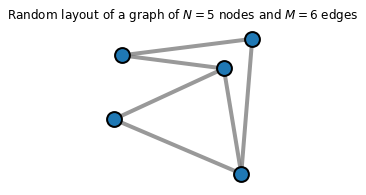

In [3]:
# Load module for plotting and visualization
import matplotlib.pyplot as plt

# Random layout
plt.figure(figsize=(3,3))
pos = nx.random_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=220, edgecolors='black', linewidths=2)
nx.draw_networkx_edges(G, pos, alpha=0.8, edge_color='grey', width=4.0)
plt.title(f'Random layout of a graph of $N={nx.number_of_nodes(G)}$ nodes and $M={nx.number_of_edges(G)}$ edges')
plt.axis('off')
plt.show()


<h4><font color="magenta">💻 <strong>Exercise:</strong></font></h4>

<div style="background-color:#f8f9fa; border-left: 4px solid #ccc; padding: 10px; margin: 10px 0;">
Change the above code to use:
<ul>
  <li><strong>White circles</strong> around the nodes</li>
  <li><strong>Blue edges</strong></li>
  <li>Use the option <code>node_color='red'</code> to make the nodes red</li>
</ul>
Observe how these style changes affect the graph's appearance.
</div>


#### **First random graphs**

Below, we will randomly generate a graph $N=12$ nodes and $M=28$ edges using `nx.gnm_random_graph` and then visualize the graph them in three different ways. Each time you run the code, you get a different graph and a different representation.

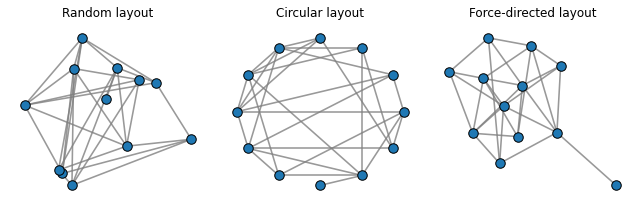

In [4]:
# Draw randomly a graph
N = 12
M = 28
G = nx.gnm_random_graph(N, M, directed= False) # If directed = True, then the graph is directed

# Plot the graph with different layouts
# Create a figure with subplots
fig, axs = plt.subplots(1, 3, figsize=(9, 3))

# Random layout
pos = nx.random_layout(G)
axs[0].set_title('Random layout')
nx.draw_networkx_nodes(G, pos, ax=axs[0], node_size=90, edgecolors='black', linewidths=1)
nx.draw_networkx_edges(G, pos, ax=axs[0], alpha=0.8, edge_color='grey', width=1.6)
axs[0].axis('off')

# Circular layout
pos = nx.circular_layout(G)
axs[1].set_title('Circular layout')
nx.draw_networkx_nodes(G, pos, ax=axs[1], node_size=90, edgecolors='black', linewidths=1)
nx.draw_networkx_edges(G, pos, ax=axs[1], alpha=0.8, edge_color='grey', width=1.6)
axs[1].axis('off')

# Force-directed layout
pos = nx.spring_layout(G, k=0.75)  # Smaller k value for more repulsion
axs[2].set_title('Force-directed layout')
nx.draw_networkx_nodes(G, pos, ax=axs[2], node_size=90, edgecolors='black', linewidths=1)
nx.draw_networkx_edges(G, pos, ax=axs[2], alpha=0.8, edge_color='grey', width=1.6)
axs[2].axis('off')

# Display the plots
plt.tight_layout()
plt.show()


These visual representations are all **geometrically different**, but they are **topologically equivalent** since they preserve the exact pattern of connections between the nodes.

#### **1.2.2 Matrix Representation**

An **adjacency matrix** is a square matrix used to represent a graph. The elements of the matrix indicate whether pairs of vertices are adjacent or not in the graph. Given a graph $G$ with $N$ vertices, its adjacency matrix $ A $ is a $ N \times N $ matrix whose entry in the $i$-th row and $j$-th column, denoted $A_{ij}$,  is be defined as:
$$
A_{ij} =
\begin{cases}
1 & \text{if there is an edge between vertex } i \text{ and vertex } j, \\
0 & \text{otherwise.}
\end{cases}
$$
For undirected graphs, since the edge between vertex $i$ and vertex $j$ is the same as between vertex $j$ and vertex $i$, the matrix is symmetric:
$$
A_{ij} = A_{ji}.
$$


For instance, the adjacency matrix corresponding to the graph in Figure 1 is written as:
$$
A = \begin{pmatrix}
0 & 1 & 1 & 0 & 1 \\
1 & 0 & 1 & 0 & 0 \\
1 & 1 & 0 & 1 & 0 \\
0 & 0 & 1 & 0 & 1 \\
1 & 0 & 0 & 1 & 0 \\
\end{pmatrix}
$$
This matrix shows a '1' wherever there is a direct connection between nodes, and '0' otherwise. The matrix is symmetric, indicating that the graph is undirected.

In [5]:
# Load library for numerical analysis
import numpy as np

# Get the adjacency matrix as a SciPy sparse matrix (zeros are not recorded)
A = nx.adjacency_matrix(G)

# Convert it to a NumPy array if you prefer working with NumPy
A = A.toarray()
print("Adjacency Matrix:\n", A)

Adjacency Matrix:
 [[0 1 0 0 0 0 1 0 1 0 1 1]
 [1 0 0 0 1 0 1 1 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0 1 1]
 [0 0 0 0 1 1 1 0 0 0 0 1]
 [0 1 1 1 0 1 1 1 0 0 0 0]
 [0 0 1 1 1 0 1 0 1 0 1 0]
 [1 1 0 1 1 1 0 1 0 0 0 0]
 [0 1 0 0 1 0 1 0 1 0 1 1]
 [1 0 0 0 0 1 0 1 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [1 0 1 0 0 1 0 1 1 1 0 0]
 [1 0 1 1 0 0 0 1 0 0 0 0]]


We will now modify the last example to assign a weight to each edge, hence modifying its adjacency matrix. We will also verify that the resulting weighted adjacency matrix is symmetric.

In [6]:
# Assign random weights to each edge
for (u, v) in G.edges():
    G.edges[u, v]['weight'] = np.random.rand()

# Get the adjacency matrix as a NumPy array
A = (nx.adjacency_matrix(G)).toarray()

print("Adjacency Matrix:\n", A)

# Test whether the matrix is symmetric
is_symmetric = np.allclose(A, A.T, atol=1e-9)  # A.T is the transpose of A
print(f"\nAdjacency matrix is symmetric: {is_symmetric}")


Adjacency Matrix:
 [[0.         0.56268792 0.         0.         0.         0.
  0.67976206 0.         0.27876834 0.         0.98370654 0.38954609]
 [0.56268792 0.         0.         0.         0.06911673 0.
  0.03728893 0.06464084 0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.1733006  0.95624696
  0.         0.         0.         0.         0.18124624 0.63713045]
 [0.         0.         0.         0.         0.67202253 0.73618329
  0.00308925 0.         0.         0.         0.         0.71660423]
 [0.         0.06911673 0.1733006  0.67202253 0.         0.20094596
  0.98102898 0.76900401 0.         0.         0.         0.        ]
 [0.         0.         0.95624696 0.73618329 0.20094596 0.
  0.75334556 0.         0.8022518  0.         0.18520096 0.        ]
 [0.67976206 0.03728893 0.         0.00308925 0.98102898 0.75334556
  0.         0.40779711 0.         0.         0.         0.        ]
 [0.         0.06464084 0.         0.         

As shown below, you can also define a graph directely from a matrix, with or without weights.

In [7]:
H = nx.Graph(A)

<h4><font color="magenta">💻  <strong>Exercise:</strong></font></h4>

<div style="background-color:#f8f9fa; border-left: 4px solid #ccc; padding: 10px; margin: 10px 0;">
Verify that the graphs <code>G</code> and <code>H</code> created above have the <strong>same number of nodes</strong> and the <strong>same number of edges</strong>.
</div>

<details>
<summary>🔎 Hint</summary>

Use <code>nx.number_of_nodes(G)</code> and <code>nx.number_of_edges(G)</code> for both graphs and compare.

</details>

<details>
<summary>✅ Solution</summary>

```python
# Compare number of nodes
same_nodes = G.number_of_nodes() == H.number_of_nodes()

# Compare number of edges
same_edges = G.number_of_edges() == H.number_of_edges()

print("Same number of nodes:", same_nodes)
print("Same number of edges:", same_edges)


#### **1.2.3 Visualization of weighted and directed graphs**

We first go back to the previous example where the graph is weighted and represent the weights using the thickness of the edges.

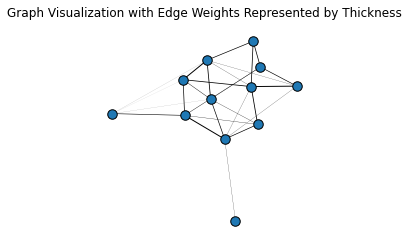

In [8]:
## Visualize the weighted graph
plt.figure(figsize=(4,4))

# Extract weights for visualization
weights = 40*[G[u][v]['weight'] for u, v in G.edges()]

# Draw the graph with edge thickness corresponding to weights
pos = nx.spring_layout(G)  # Positions for all nodes

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=90, edgecolors='black', linewidths=1)

# Draw edges with varying thickness
nx.draw_networkx_edges(G, pos, width=weights)

plt.title("Graph Visualization with Edge Weights Represented by Thickness")
plt.axis('off')
plt.show()

In all revious examples, graph were undirected. We now go back to the very first example and create a directed graph.

In [9]:
# Create a nx graph object
G = nx.DiGraph()   # Create an empty directed graph
G.add_edge(1, 2) # Add the directed edge (1,2)
G.add_edge(1, 3)
G.add_edge(1, 5)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(4, 5)

<h4><font color="magenta">💻 <strong>Exercise:</strong></font></h4>

<div style="background-color:#f8f9fa; border-left: 4px solid #ccc; padding: 10px; margin: 10px 0;">
Extract the <strong>adjacency matrix</strong> of the graph as a <code>numpy</code> array and check whether it is <strong>asymmetric</strong>.
<br><br>
How could you modify the graph (e.g., by adding edges) to make the adjacency matrix <strong>symmetric</strong>?
</div>

<details>
<summary>🔍 Hint</summary>

- Use `A = nx.to_numpy_array(G)` to extract the adjacency matrix as a NumPy array.
- To check symmetry, compare the matrix with its transpose using `np.allclose(A, A.T)`.
- A graph with a **symmetric adjacency matrix** corresponds to an **undirected** graph.

</details>

<details>
<summary>✅ Solution</summary>

```python
import numpy as np

# Convert graph to numpy adjacency matrix
A = nx.to_numpy_array(G)

# Check symmetry
is_symmetric = np.allclose(A, A.T)

print("Adjacency matrix is symmetric:", is_symmetric)

# Optional: how to make it symmetric
# You can symmetrize the adjacency matrix manually like this:
A_symmetric = (A + A.T) / 2

# Or create an undirected version of the graph:
G_symmetric = G.to_undirected()


#### **1.2.4 Random weighted and directed graphs**

Below, we **randomly select a directed graph with a given number of vertices and edges**. We also randomly attribute a weight to each edge.

The `gnm_random_graph(n, m)` model in NetworkX generates a random graph by:

- Drawing a graph with exactly **n nodes** and **m edges**.
- Selecting **m random pairs of nodes** to connect.
- Optionally, the graph can be **directed** by passing `directed=True`.

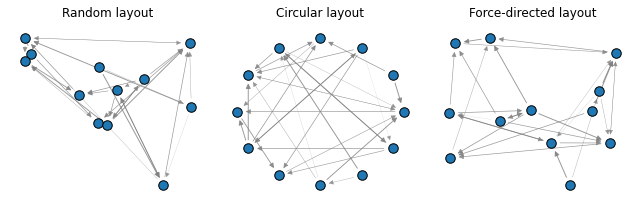

In [10]:
# Draw randomly a directed graph (digraph)
N = 12
M = 28
G = nx.gnm_random_graph(N, M, directed= True)

# Assign random weights to each edge
for (u, v) in G.edges():
    G.edges[u, v]['weight'] = np.random.rand()

# Extract weights for visualization
weights = 40*[G[u][v]['weight'] for u, v in G.edges()]

# Plot the graph with different layouts
# Create a figure with subplots
fig, axs = plt.subplots(1, 3, figsize=(9, 3))

# Random layout
pos = nx.random_layout(G)
axs[0].set_title('Random layout')
nx.draw_networkx_nodes(G, pos, ax=axs[0], node_size=90, edgecolors='black', linewidths=1)
nx.draw_networkx_edges(G, pos, ax=axs[0], alpha=0.8, edge_color='grey', width=weights)
axs[0].axis('off')

# Circular layout
pos = nx.circular_layout(G)
axs[1].set_title('Circular layout')
nx.draw_networkx_nodes(G, pos, ax=axs[1], node_size=90, edgecolors='black', linewidths=1)
nx.draw_networkx_edges(G, pos, ax=axs[1], alpha=0.8, edge_color='grey', width=weights)
axs[1].axis('off')

# Force-directed layout
pos = nx.spring_layout(G, k=0.75)  # Smaller k value for more repulsion
axs[2].set_title('Force-directed layout')
nx.draw_networkx_nodes(G, pos, ax=axs[2], node_size=90, edgecolors='black', linewidths=1)
nx.draw_networkx_edges(G, pos, ax=axs[2], alpha=0.8, edge_color='grey', width=weights)
axs[2].axis('off')

# Display the plots
plt.tight_layout()
plt.show()

Below, we illustrate the adjacency matrix and show that it's not symmetric.

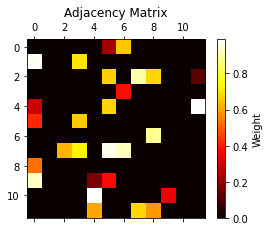


Adjacency matrix is symmetric: False


In [11]:
# Compute and plot the adjacency matrix
A = nx.to_numpy_array(G)

# Plot the adjacency matrix
plt.matshow(A, cmap='hot')
plt.title('Adjacency Matrix')
plt.colorbar(label='Weight',shrink=0.8)
plt.show()

# Check whether the adjacency matrix is symmetric
is_symmetric = np.allclose(A, A.T, atol=1e-8)
print(f"\nAdjacency matrix is symmetric: {is_symmetric}")

<h4><font color="magenta">💻 <strong>Optional exercise:</strong></font></h4>

<div style="background-color:#f8f9fa; border-left: 4px solid #ccc; padding: 10px; margin: 10px 0;">
Modify the graph generation line to produce an <strong>undirected</strong> version of the same graph.
<br><br>
<ul>
  <li>Only change <strong>one line</strong>.</li>
  <li>Then re-run the notebook cells and observe:</li>
  <ul>
    <li>How the <strong>visual layout</strong> changes.</li>
    <li>How the <strong>adjacency matrix</strong> differs.</li>
    <li>Whether the matrix is now <strong>symmetric</strong>.</li>
  </ul>
</ul>
</div>


<details>
<summary>🔍 Hint</summary>

-  `1/2*(A + A.T) ` is symmetric.

</details>

## <font color="blue"> **2. Structural Connectivity** </font>

Structural connectomes are comprehensive maps that depict the physical or anatomical connections between different elements within the brain, whether they are neurons, groups of neurons, or large brain regions. These maps detail the neural pathways and synapses, providing a structural framework for understanding how different parts of the brain are wired and how they communicate with each other.

### **2.1 Relationship with graphs**
Structural connectomes are commonly represented as **graphs** in the field of network neuroscience. In this representation:

- **Vertices** (or nodes) represent the structural components of the brain, such as individual neurons, clusters of neurons, or whole brain regions, depending on the scale of the connectome.
- **Edges** (or links) represent the physical connections between these nodes, such as axonal pathways or white matter tracts.

### **2.2 Connectomes at different scales**

Structural connectomes exist at different scales of observation: microscopic connectomes detail individual neurons and their synapses to reveal intricate brain architecture, mesoscopic connectomes examine groups of neurons within specific regions to explore local network interactions, and macroscopic connectomes focus on major brain areas, analyzing how these regions are interconnected to support complex behaviors and cognitive functions.

1. **Microscopic Structural Connectomes**:
   - **Scale**: Individual neurons and their synaptic connections.
   - **Graph Representation**: Each node represents a single neuron, and each edge represents a synaptic connection between neurons.
   - **Purpose**: To explore the most detailed level of brain architecture and understand the direct synaptic pathways that underpin specific neural circuits and their functionalities.
   - **Species studied**: Caenorhabditis elegans ([White et al. 1986](https://doi.org/10.1098/rstb.1986.0056)),  Ciona intestinalis ([Ryan et al. 2016]( https://doi.org/10.7554/eLife.16962)), Platynereis dumerilii ([Verasztó et al. 2020](https://doi.org/10.1101/2020.08.21.260984)), Drosophila melanogaster([Scheffer et al. 2020](https://doi.org/10.7554/eLife.57443), [Winding et al. 2023](https://www.science.org/doi/10.1126/science.add9330), [Lin et al. 2024](https://www.biorxiv.org/content/10.1101/2023.07.29.551086v2)).

2. **Mesoscopic Structural Connectomes**:
   - **Scale**: Groups of neurons or neural circuits within specific brain regions.
   - **Graph Representation**: Nodes represent groups of neurons or neural circuits, and edges represent the neural pathways (e.g., bundles of axons) connecting these groups.
   - **Purpose**: To study how local networks interact within larger brain systems and to map the connectivity within specific functional areas or along specific sensory/motor pathways.
   - **Species studies**: Mouse ([Oh et al. 2014](https://doi.org/10.1038/nature13186)), Zebrafish ([Kunst et al. 2019](https://doi.org/10.1016/j.neuron.2019.04.034)), etc.

3. **Macroscopic Structural Connectomes**:
   - **Scale**: Major brain regions or areas.
   - **Graph Representation**: Nodes are large brain regions (like the cortex, thalamus, etc.), and edges represent major white matter tracts that connect these regions.
   - **Purpose**: To understand the high-level organization of the brain and how broad regions collaborate to support complex behaviors and cognitive processes.
   - **Species studied**: Human, primates, other mammels, etc.

Each level of these connectomes provides unique insights into the brain's structure and functionality, offering different perspectives from the finest details to the broadest interactions.

<h4><font color="magenta">🌐 <strong>Exercise:</strong></font></h4>

<div style="background-color:#f8f9fa; border-left: 4px solid #ccc; padding: 10px; margin: 10px 0;">
To explore specific connectomes, visit the 
<a href="https://networks.skewed.de/" target="_blank"><strong>Netzschleuder network catalogue, repository, and centrifuge</strong></a>
and search for the keyword <code>connectome</code>.

You can also find a curated list of public brain network datasets in this 
<a href="https://github.com/faskowit/brain-networks-across-the-web" target="_blank">GitHub repository</a>.
</div>


### **2.3 The very first structural connectome: C. elegans**

The first complete connectome was mapped for *Caenorhabditis elegans* (C. elegans), a transparent roundworm used as a model organism in neurobiology. The project was led by John White, part of Sydney Brenner's team, who published their findings in 1986. This work detailed the synaptic connections of all 302 neurons in C. elegans, providing crucial insights into neural networks and behavior. The simplicity and genetic tractability of C. elegans make it ideal for such detailed study, setting a precedent for further connectome research in more complex organisms.

<img src="https://upload.wikimedia.org/wikipedia/commons/4/46/Caenorhabditis_elegans_hermaphrodite_adult-en.svg" alt="Caenorhabditis elegans hermaphrodite adult" width="300"/> ![Moving C. elegans](https://upload.wikimedia.org/wikipedia/commons/b/be/CrawlingCelegans.gif)


#### 2.3.1 Get data

Below, we connect to the url https://networks.skewed.de/net/celegansneural and extract the edge list for the C. elegans connectome. We then creat the correspondng directed graph in NetworkX.

In [12]:
import requests     # For making HTTP requests, used here to download the ZIP file from a URL
import zipfile      # For handling ZIP files, used here to extract contents from the downloaded ZIP file
import io           # Provides core tools for working with streams of data, used here for handling file content as a string
import pandas as pd # Provides data structures and data analysis tools, used here to work with tabular data (DataFrame)


# URL of the ZIP file
zip_url = "https://networks.skewed.de/net/celegansneural/files/celegansneural.csv.zip"

# Download the ZIP file
response = requests.get(zip_url)

# Check if the download was successful
if response.status_code == 200:
    # Extract the contents of the ZIP file
    with zipfile.ZipFile(io.BytesIO(response.content)) as zf:
        # Check if 'edges.csv' exists in the ZIP file
        if 'edges.csv' in zf.namelist():
            # Open 'edges.csv' and read it into a Pandas DataFrame
            with zf.open('edges.csv') as csv_file:
                # Read CSV content as string
                csv_content = csv_file.read().decode('utf-8')

                # Split into lines
                lines = csv_content.splitlines()

                # Remove '# ' from the beginning of the first line
                if lines[0].startswith('# '):
                    lines[0] = lines[0][2:]

                # Join lines back into a single string
                csv_content_processed = '\n'.join(lines)

                # Read processed CSV content into DataFrame
                df_edges = pd.read_csv(io.StringIO(csv_content_processed), skipinitialspace=True)

                # Rename columns to remove leading spaces or characters
                df_edges.rename(columns={'# source': 'source', ' target': 'target', ' value': 'value'}, inplace=True)

        else:
            print("edges.csv not found in the ZIP file.")
else:
    print(f"Failed to download ZIP file. Status code: {response.status_code}")

# Display the DataFrame to verify
df_edges # You can also use print(df_edges.head())

,source,target,value
0,0,1,1
1,0,2,2
2,0,3,1
3,0,4,2
4,0,5,1
...,...,...,...
2354,292,44,1
2355,293,44,1
2356,294,44,1
2357,295,190,1


#### 2.3.2 Build graph and visual display in NetworkX

Number of nodes: 297
Number of edges: 2345


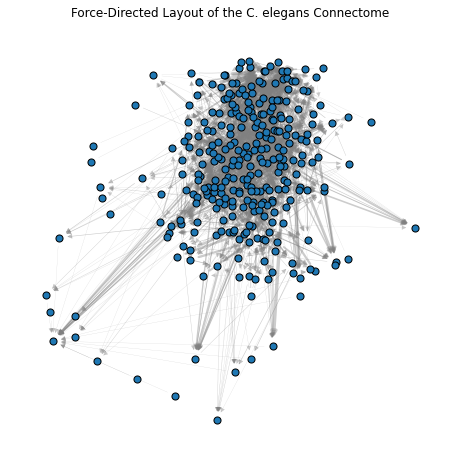

In [13]:
# Create a directed graph (DiGraph)
G = nx.DiGraph()

# Add edges from DataFrame
for _, row in df_edges.iterrows():
    source = int(row['source'])  # Convert to int assuming nodes are represented as integers
    target = int(row['target'])  # Convert to int assuming nodes are represented as integers
    weight = float(row['value'])  # Convert to float assuming weights are represented as floats

    G.add_edge(source, target, weight=weight)

# Count nodes and edges, measure density
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")


# Extract edge weights
edge_weights = [0.2*G[u][v]['weight'] for u, v in G.edges()]

# Plot the graph with force-directed layout
plt.figure(figsize=(8,8))
pos = nx.spring_layout(G, k=0.4)  # Smaller k value for more repulsion
nx.draw_networkx_nodes(G, pos, node_size=50, edgecolors='black', linewidths=1)
nx.draw_networkx_edges(G, pos, alpha=0.4, edge_color='grey', width=edge_weights )
plt.title('Force-Directed Layout of the C. elegans Connectome')
plt.axis('off')
plt.show()

After visualizing this connectome, we can appreciate the complexity and richness of its structure. Visualization provides an intuitive understanding of the network's architecture, revealing clusters, hubs, and potentially pathways. However, to systematically analyze and understand the functional and structural properties of this neural network, we need to move beyond visual inspection.

### **2.4 Structural connectivity at mesoscale: Zebrafish**

The larval zebrafish, typically around 5 to 7 days post-fertilization, is an ideal model organism for brain studies due to its small size and nearly transparent body, which allows for the imaging of its entire brain. Its brain comprises about 100,000 neurons, making it feasible to monitor all neurons under a microscope while the animal processes sensory information and generates behavior.

<img src="https://www.aging-us.com/article/103968/figure/f1/large" width="150"/>

Herwig Baier's lab at the Max Planck Institute for Biological Intelligence (Martinsried, close to Munich) has achieved significant milestones in mapping a part of the brain's structural connectivity. Using a variety of techniques, the researchers genetically labeled individual neurons with fluorescent markers. This allowed them to visualize and digitize the shape and location of over 2,000 neurons, which were then registered to a standard brain model with 72 distinct brain regions.

<img src="https://www.cell.com/cms/attachment/8616d45e-8c5a-4508-9c74-5a28cf368a99/fx1.jpg" width="350"/>

The structural data are periodically updated in the [mapZbrain atlas](https://mapzebrain.org/home), now including more than 4400 single-cell tracings. Paul De Koninck's lab has used the latest connectomics data to create a mesoscale connectome, which represents the normalized number of connections between each pair of the 70 brain regions defined in the atlas.

References:
* [Kunst, M., Laurell, E., Mokayes, N., Kramer, A., Kubo, F., Fernandes, A. M., ... & Baier, H. (2019). A cellular-resolution atlas of the larval zebrafish brain. Neuron, 103(1), 21-38.](https://doi.org/10.1016/j.neuron.2019.04.034)
* [Légaré, A., Lemieux, M., Desrosiers, P., & De Koninck, P. (2023). Zebrafish brain atlases: a collective effort for a tiny vertebrate brain. Neurophotonics, 10(4), 044409-044409.](https://doi.org/10.1117/1.NPh.10.4.044409)
* [Légaré, A., Lemieux, M., Boily, V., Poulin, S., Légaré, A., Desrosiers, P., & De Koninck, P. (2025). Structural and genetic determinants of zebrafish functional brain networks. Accepted in Science Advances. ](https://doi.org/10.1101/2024.12.20.629476)

#### 📁 Data Source

All structural data used in this notebook were originally published in:

**Légaré, Antoine; Lemieux, Mado; Boily, Vincent; Poulin, Sandrine; Légaré, Arthur; Desrosiers, Patrick; De Koninck, Paul**, 2025.  
*Structural and genetic determinants of zebrafish functional brain networks*.  
Borealis, V1. [https://doi.org/10.5683/SP3/IIVGOB](https://doi.org/10.5683/SP3/IIVGOB)

A curated subset of this dataset, necessary to run this notebook, is available here:  
🔗 [https://github.com/pdesrosiers/brain-connectivity-and-dynamics/tree/main/data/zebrafish](https://github.com/pdesrosiers/brain-connectivity-and-dynamics/tree/main/data/zebrafish)


#### **Get connectivity data**

✅ Loaded adjacency matrix from local file.
Adjacency matrix shape: (70, 70)


<Figure size 576x576 with 0 Axes>

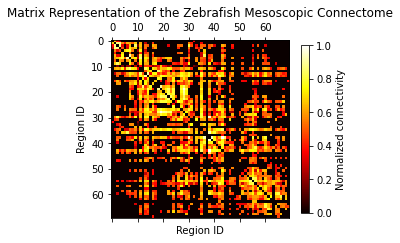

In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Define expected local path (relative to notebook in /notebooks/)
local_path = '../data/zebrafish/SC_undirected.npy'

# Define fallback URL (raw GitHub file for Colab or other environments)
url = 'https://github.com/pdesrosiers/brain-connectivity-and-dynamics/raw/main/data/zebrafish/SC_undirected.npy'
downloaded_filename = 'SC_undirected.npy'  # Name to use if downloading

# Try loading locally
try:
    adjacency_matrix = np.load(local_path, allow_pickle=True)
    print("✅ Loaded adjacency matrix from local file.")
except FileNotFoundError:
    print("⚠️ Local file not found. Attempting to download from GitHub...")
    import urllib.request
    urllib.request.urlretrieve(url, downloaded_filename)
    adjacency_matrix = np.load(downloaded_filename, allow_pickle=True)
    print("✅ Downloaded and loaded adjacency matrix from GitHub.")

# Confirm shape
print("Adjacency matrix shape:", adjacency_matrix.shape)

# Plot the matrix
plt.figure(figsize=(8, 8))
plt.matshow(adjacency_matrix, cmap='hot')
plt.title('Matrix Representation of the Zebrafish Mesoscopic Connectome')
plt.colorbar(label='Normalized connectivity', shrink=0.75)
plt.xlabel('Region ID')
plt.ylabel('Region ID')
plt.show()



<h4><font color="magenta">💻 <strong>Exercise:</strong></font></h4>

<div style="background-color:#f8f9fa; border-left: 4px solid #ccc; padding: 10px; margin: 10px 0;">
Use the adjacency matrix <code>adjacency_matrix</code> to build an undirected graph using NetworkX.<br>
Then compute and print the number of nodes and edges.
</div>

<details>
<summary>🔍 Hint</summary>

Use the `nx.from_numpy_array()` function. Since the matrix is symmetric and represents an undirected connectome, you can directly build an undirected graph from it.

</details>

<details>
<summary>✅ Solution</summary>

```python
import networkx as nx

# Convert adjacency matrix to undirected graph
G = nx.from_numpy_array(adjacency_matrix)

# Compute basic info
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

#### **Get morphological data**

We download the morphological data to locate the nodes of the connectome directly in the zebrafish brain.

##### **Projections**

✅ Loaded top_projection from local file.
✅ Loaded side_projection from local file.


<Figure size 864x504 with 0 Axes>

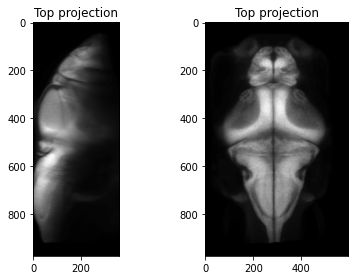

In [15]:
# Download and load top projection of the zebrafish brain

# Define expected local path 
local_path = '../data/zebrafish/top_projection.npy'

# Define fallback URL (raw GitHub file for Colab or other environments)
url = 'https://github.com/pdesrosiers/brain-connectivity-and-dynamics/raw/main/data/zebrafish/top_projection.npy'
downloaded_filename = 'top_projection.npy'  # Name to use if downloading

# Try loading locally
try:
    top_projection = np.load(local_path, allow_pickle=True)
    print("✅ Loaded top_projection from local file.")
except FileNotFoundError:
    print("⚠️ Local file not found. Attempting to download from GitHub...")
    import urllib.request
    urllib.request.urlretrieve(url, downloaded_filename)
    top_projection = np.load(downloaded_filename, allow_pickle=True)
    print("✅ Downloaded and loaded top_projection from GitHub.")


# Download and load side projection of the zebrafish brain

# Define expected local path 
local_path = '../data/zebrafish/side_projection.npy'

# Define fallback URL (raw GitHub file for Colab or other environments)
url = 'https://github.com/pdesrosiers/brain-connectivity-and-dynamics/raw/main/data/zebrafish/side_projection.npy'
downloaded_filename = 'side_projection.npy'  # Name to use if downloading

# Try loading locally
try:
    side_projection = np.load(local_path, allow_pickle=True)
    print("✅ Loaded side_projection from local file.")
except FileNotFoundError:
    print("⚠️ Local file not found. Attempting to download from GitHub...")
    import urllib.request
    urllib.request.urlretrieve(url, downloaded_filename)
    side_projection = np.load(downloaded_filename, allow_pickle=True)
    print("✅ Downloaded and loaded side_projection from GitHub.")

from scipy import ndimage                 
side_projection = ndimage.rotate(side_projection, 90)
side_projection = np.flipud(side_projection)  # Flip the image on the x-axis

# Plot morphological information
plt.figure(figsize=(12,7))
fig, axs = plt.subplots(1, 2)  # Create two subplots
axs[0].imshow(side_projection, cmap='gray')  # Display the second image
axs[0].set_title('Top projection')
axs[1].imshow(top_projection, cmap='gray')  # Display the first image
axs[1].set_title('Top projection')
# Adjust the spacing between subplots
plt.tight_layout()
plt.show()  # Show the plot

##### **Node positions**

We now get the relative $(x,y,z)$ of the centroid of each region. The positions are measured as number of pixels in the morphological images. The length of each pixel is about 1 micrometer.

In [16]:
# Get xyz positions of nodes
# Define expected local path 
local_path = '../data/zebrafish/region_centroids.npy'

# Define fallback URL (raw GitHub file for Colab or other environments)
url = 'https://github.com/pdesrosiers/brain-connectivity-and-dynamics/raw/main/data/zebrafish/region_centroids.npy'
downloaded_filename = 'region_centroids.npy'  # Name to use if downloading

# Try loading locally
try:
    xyz = np.load(local_path, allow_pickle=True)
    print("✅ Loaded region centroids from local file.")
except FileNotFoundError:
    print("⚠️ Local file not found. Attempting to download from GitHub...")
    import urllib.request
    urllib.request.urlretrieve(url, downloaded_filename)
    xyz = np.load(downloaded_filename, allow_pickle=True)
    print("✅ Downloaded and loaded region centroids from GitHub.")


# Create dictionaries for xy and xz positions
xy = xyz[:, 0:2]
xy_dic = {i: xy[i,:] for i in range(70)}
zy = xyz[:, (2,1)]
zy_dic = {i: zy[i,:] for i in range(70)}

✅ Loaded region centroids from local file.


<h4><font color="magenta">💻 <strong>Exercise:</strong></font></h4>


>  The dataset `xyz` contains the 3D coordinates of **140 brain regions**, with the **first 70** corresponding to the **left hemisphere** and the next 70 to the **right hemisphere**.
> 
> - Create a 3D scatter plot of all brain region centroids.
> 
> - Use **different colors** to distinguish between the two hemispheres.
>   
> - Annotate a few selected brain regions (e.g., every 10th region) with their index to help visualize the spatial organization.


<details>
<summary>✅ Solution</summary>

```python
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot of brain region centroids
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Extract x, y, z coordinates
x, y, z = xyz[:, 0], xyz[:, 1], xyz[:, 2]

# Define colors for left and right hemispheres
colors = ['darkorange'] * 70 + ['steelblue'] * 70

# Plot the nodes with hemisphere-specific colors
sc = ax.scatter(x, y, z, c=colors, s=40, edgecolors='k')

# Annotate a few regions to reduce clutter
for i in [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130]:
    ax.text(x[i], y[i], z[i], f'{i}', fontsize=8, ha='center')

# Labels and appearance
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Scatter Plot of Brain Region Centroids')

plt.tight_layout()
plt.show()
```

#### **Connectivity embedded in morphology**

<Figure size 1440x720 with 0 Axes>

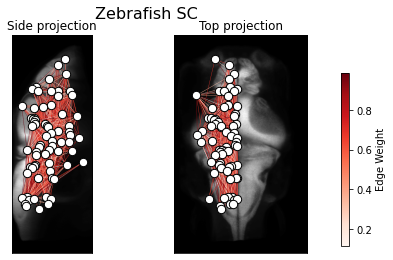

In [17]:
#Solution to previous exercise
G = nx.from_numpy_array(adjacency_matrix) 

# Define colormap for edges
import matplotlib.cm as cm                # Colormaps
cmap = cm.ScalarMappable(cmap='Reds')

# Plot morphological information and connectome information
plt.figure(figsize=(20, 10))
fig, axs = plt.subplots(1, 2)  # Create two subplots

# Display the second image
axs[0].imshow(side_projection, cmap='gray')  # Display the second image
nx.draw_networkx_nodes(G, zy_dic, ax=axs[0], node_color='white',
                       node_size=70, edgecolors='black', linewidths=1)
nx.draw_networkx_edges(G, zy_dic, ax=axs[0], alpha=0.8,
                       edge_color=cmap.to_rgba(weights), width=0.4)
axs[0].set_title('Side projection')

# Display the first image and the network on the same subplot
axs[1].imshow(top_projection, cmap='gray')  # Display the first image
nx.draw_networkx_nodes(G, xy_dic, ax=axs[1], node_color='white',
                       node_size=70, edgecolors='black', linewidths=1)
nx.draw_networkx_edges(G, xy_dic, ax=axs[1], alpha=0.8,
                       edge_color=cmap.to_rgba(weights), width=0.4)
axs[1].set_title('Top projection')

# Add a global title
plt.suptitle('Zebrafish SC', fontsize=16)

# Add vertical color bar to the left
fig.subplots_adjust(left=0.1, right=0.9)
cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.6])  # [left, bottom, width, height]
cbar = plt.colorbar(cmap, cax=cbar_ax, orientation='vertical')
cbar.set_label('Edge Weight')

# Adjust the spacing between subplots
plt.show()  # Show the plot

#### **Complementary information: Brain region names and indices**

In [18]:
# Define expected local path 
local_path = '../data/zebrafish/region_names.npy'

# Define fallback URL (raw GitHub file for Colab or other environments)
url = 'https://github.com/pdesrosiers/brain-connectivity-and-dynamics/raw/main/data/zebrafish/region_names.npy'
region_names = 'region_names.npy'  # Name to use if downloading

# Try loading locally
try:
    region_names = np.load(local_path, allow_pickle=True)
    print("✅ Loaded region names from local file.")
except FileNotFoundError:
    print("⚠️ Local file not found. Attempting to download from GitHub...")
    import urllib.request
    urllib.request.urlretrieve(url, downloaded_filename)
    region_names = np.load(downloaded_filename, allow_pickle=True)
    print("✅ Downloaded and loaded region names from GitHub.")

# Print region ID and name
print('\n')
for id in range(len(region_names)):
  print(str(id) + ':' + region_names[id])

✅ Loaded region names from local file.


0:olfactory_epithelium
1:olfactory_bulb
2:ventral_telencephalon_(subpallium)
3:dorsal_telencephalon_(pallium)
4:dorsal_habenula
5:epiphysis
6:ventral_habenula
7:ventral_entopeduncular_nucleus
8:eminentia_thalami_(remaining)
9:preoptic_region
10:retina
11:ventral_thalamus__alar_part
12:torus_longitudinalis
13:dorsal_thalamus_proper
14:pretectum__alar_part
15:stratum_opticum
16:posterior_tuberculum_(basal_part_of_prethalamus_and_thalamus)
17:rostral_hypothalamus
18:stratum_marginale
19:stratum_fibrosum_et_griseum_superficiale
20:sfgs__sgc
21:stratum_griseum_centrale
22:sac__spv
23:stratum_album_centrale
24:medial_tegmentum_(remaining)
25:diffuse_nucleus_of_the_inferior_lobe
26:nucleus_of_the_medial_longitudinal_fascicle_(pretectum_basal_part)
27:lateral_tegmentum
28:periventricular_layer
29:torus_semicircularis
30:intermediate_hypothalamus_(remaining)
31:oculomotor_nucleus
32:trigeminal_ganglion
33:trochlear_motor_nucleus
34:pituitary
35:nucleus_i

## <font color="blue"> **3. Graph Metrics** </font>

In network neuroscience, graph theory metrics (topological features or statistics) are essential for analyzing the structural and functional properties of neural networks. Below, we will explore the most commonly used metrics ([Rubinov & Sporns, 2010](https://doi.org/10.1016/j.neuroimage.2009.10.003), [Basset et al. 2017](https://doi.org/10.1038/nn.4502), [Zamani Esfahlani et al. 2022](https://doi.org/10.1038/s41467-022-29770-y)).

We now review some of the most relevant graph metrics and use them to characterize the C. elegans connectome.  

### **3.1 Density**

The density (a.k.a. connectectivity or connection probability $p$) of a graph is a measure of how many edges are present relative to the total number of possible edges between its nodes.

In [19]:
density = nx.density(G)
print(f"Density: {density:.3f}")

Density: 0.424


#### **More random graphs**

The **Erdős–Rényi (ER)** model is a fundamental model of random graphs where each possible edge between a pair of $ N $ nodes is created **independently** with a fixed **probability $ p $**. This version of the model is often referred to as **G(n, p)**.

- In **G(n, p)**, the **expected number of edges** is $ p \cdot \frac{N(N-1)}{2} $ for undirected graphs, or $ p \cdot N(N-1) $ for directed graphs.
- Every edge is formed independently, which means the total number of edges may vary between graph realizations.

This differs from the **G(n, m)** model, where exactly **$ m $** edges are added randomly to the graph. In G(n, m), the total number of edges is fixed in advance, while in G(n, p), the number of edges is a random variable centered around its expected value.

In our case, once the density of the empirical connectome is known, we can use it as the parameter $ p $ in the ER model to generate **random graphs with similar average sparsity**, allowing for useful comparisons with the real brain network.


Density of generated random graph G_random: 0.410



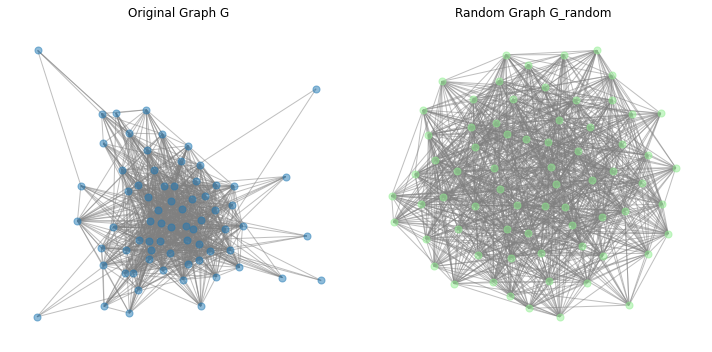

In [20]:
# Generate a random graph with the same number of nodes and density using ER model
N = G.number_of_nodes()  # Number of nodes in graph G
p = density  # Edge probability based on the density of G

# Generate randomly a grapg from the ER model
G_random = nx.erdos_renyi_graph(N, p, directed=False)

# Calculate density of the generated random graph (optional check)
density_random = nx.density(G_random)
print(f"Density of generated random graph G_random: {density_random:.3f}\n")

# Plotting both graphs side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot original graph G
axs[0].set_title('Original Graph G')
pos = nx.spring_layout(G, k=0.2, seed=42)  # Fixed seed and k for layout consistency
nx.draw(G, pos, with_labels=False, edge_color='grey', node_size=50, ax=axs[0],
        alpha=0.5)

# Plot random graph G_random
axs[1].set_title('Random Graph G_random')
pos_random = nx.spring_layout(G_random, k=0.2, seed=42)  # Fixed seed and k for layout consistency
nx.draw(G_random, pos_random, with_labels=False, node_color='lightgreen', edge_color='grey',
        node_size=50, ax=axs[1], alpha=0.5)

plt.tight_layout()
plt.show()

<h4><font color="magenta">💻 <strong>Exercise:</strong></font></h4>

> Create a list of 10 graphs randomly generated using `nx.erdos_renyi_graph(N, p, directed=True)`.
>
> - Check if each graph has **approximately the same density** as the connectome `G`.
> - Verify that the 10 randomly generated graphs are **not all identical**.


<details>
<summary>🔍 Hint</summary>

Set `N = G.number_of_nodes()` and `p = nx.density(G)`, which computes the reference density from the real connectome.  
- Then, in a loop, create 10 random graphs with `nx.erdos_renyi_graph(N, p, directed=True)`  
and collect their densities using `nx.density(G_i)`.
- You can compare the sets of edges using `G.edges()` or `G.edges(data=True)`. For example, you could compare:
```python
set(G1.edges()) != set(G2.edges())
```
</details>

<details>
<summary>✅ Solution</summary>

```python
import networkx as nx

# Get number of nodes and reference density from original graph
N = G.number_of_nodes()
p = nx.density(G)

# Generate 10 random directed graphs with same N and p
random_graphs = [nx.erdos_renyi_graph(N, p, directed=True) for _ in range(10)]

# Compute and print densities
for i, Gi in enumerate(random_graphs):
    d = nx.density(Gi)
    print(f"Graph {i+1} density: {d:.4f}")
```
```python
# Check if all graphs are identical by comparing their edge sets
identical = True

for i in range(len(random_graphs)):
    for j in range(i + 1, len(random_graphs)):
        if set(random_graphs[i].edges()) != set(random_graphs[j].edges()):
            print(f"Graphs {i+1} and {j+1} are different.")
            identical = False
            break
    if not identical:
        break

if identical:
    print("All graphs are identical (unexpected).")
else:
    print("Confirmed: Not all graphs are identical.")
```

### **3.2 Transitivity (global clustering coefficient)**:

  - **Definition**: This metric measures the overall probability that the adjacent nodes of a node are connected, calculated as the ratio of the number of triangles to the number of connected triples of nodes.
  - **Relevance**: High transitivity indicates a strong tendency for nodes to form tightly knit groups, which can be critical for local information processing and robustness in neural networks.
  - **Expectation**: High transitivity is expected in brain connectomes, reflecting the presence of tightly knit groups or clusters that contribute to local processing and network robustness.
  - **Formula**: In an undirected graph, the global clustering coefficient is calculated as:
  $$
    C = \frac{3 \times \text{number of triangles}}{\text{number of connected triples of nodes}}
  $$

<figure>
    <img src="https://raw.githubusercontent.com/pdesrosiers/public_data/main/images/clustering.png" alt="Clustering" width="800"/>
</figure>

Below we compute the global clustering coefficient for the C. elegans connectome using `nx.transitivity`.

In [21]:
    # Compute  transitivity
    transitivity = nx.transitivity(G)
    print(f"Transitivity in the zebrafish SC: {transitivity}")

Transitivity in the zebrafish SC: 0.6354463273712437


<h4><font color="magenta">💻 <strong>Exercise:</strong></font></h4>

> - Check that the transitivity of the connectome is much higher than in a randomized version preserving density.
>
> - (Optional) Generate 1000 random graphs from the Erdös-Rényi model with density $p$ (defined above) and compute the probability of having a transitivity at least as large as that of the connectome. This would give you a $p$-value.

<details>
<summary>🔍 <strong>Hint</strong></summary>

- Use `nx.transitivity(G)` to compute the transitivity as above.
- Use `nx.erdos_renyi_graph(N, p, directed=True)` with $p = $ `density` to generate random graphs.
- Count how many of the 1000 graphs have a transitivity at least as high as that of the connectome to estimate a p-value.
</details>

<details>
<summary>✅ <strong>Solution</strong></summary>

```python
# Compute transitivity of the empirical connectome
T_empirical = nx.transitivity(G)
print(f"Transitivity of the connectome: {T_empirical:.4f}")

# Parameters
N = G.number_of_nodes()
p = nx.density(G)

# Random graph and its transitivity
G_rand = nx.erdos_renyi_graph(N, p, directed=True)
T_rand = nx.transitivity(G_rand)
print(f"Transitivity of the random graph: {T_rand:.4f}") 

# Randm experiments with null model
n_trials = 1000

# Generate ER random graphs and compute transitivity
T_random = []
for _ in range(n_trials):
    G_rand = nx.erdos_renyi_graph(N, p, directed=True)
    T_random.append(nx.transitivity(G_rand))

# Compare with empirical value
T_random = np.array(T_random)
mean_T = T_random.mean()
p_value = np.mean(T_random >= T_empirical)

print(f"Mean transitivity of ER random graphs: {mean_T:.4f}")
print(f"P-value: {p_value:.4f}")

# Optional: Visualize distribution
plt.hist(T_random, bins=30, alpha=0.7, label='ER graphs')
plt.axvline(T_empirical, color='red', linestyle='--', label='Connectome')
plt.xlabel("Transitivity")
plt.ylabel("Count")
plt.title("Transitivity: Connectome vs ER graphs")
plt.legend()
plt.show()

### **3.3 Shortest path length**
   - **Definition**: The path length is the number of edges in the shortest path between two nodes. The average shostest path length (SPL) is the average of these shortest paths taken over all pairs of nodes in the graph.
   - **Relevance**: This measure helps in understanding the efficiency of information transfer across the network. Shorter average path lengths typically indicate more efficient global communication.
   - **Expectation**: In brain connectomes, shorter average path lengths are expected, indicating efficient communication pathways that facilitate rapid information transfer between distant brain regions.

"The figure below is a graph of $ N=8 $ nodes and $ M=13 $ edges. The purple lines indicate a possible path between nodes 1 and 8, while the magenta lines show the shortest path between these nodes, with a length of 4.

<figure>
    <img src="https://raw.githubusercontent.com/pdesrosiers/public_data/main/images/shortest-path-length.png" alt="Clustering" width="600"/>
</figure>

In a directed graph, the **average shortest path length** can only be computed inside a strongly connected component (SCC), which is subset of nodes where each node is reachable from every other node within this subset, considering the direction of the edges. Formally, a SCC in a directed graph $ G = (V, E) $ is a maximal subgraph $ G' = (V', E') $ such that for every pair of vertices $ u, v \in V' $, there exists a directed path from $ u $ to $ v $ and from $ v $ to $ u $ in $ G' $.


In [22]:
# Check if the graph is connected
if nx.is_connected(G):
    print("The graph is connected.")
    
    # Compute the average shortest path length
    avg_path_length = nx.average_shortest_path_length(G)
    print(f"Average shortest path length: {avg_path_length:.3f}")
else:
    print("The graph is not connected. You should extract the largest connected component using:")
    print("- nx.connected_components(G) to get all components")
    print("- max(..., key=len) to find the largest one")
    print("- G.subgraph(...) to create the subgraph")
    print("- Then compute nx.average_shortest_path_length(...) on this subgraph")


The graph is connected.
Average shortest path length: 1.608


To compute the average shortest path length while taking edge weights into account, simply pass the weight parameter like below. This treats the weights as distances when calculating shortest paths.

In [23]:
# Compute the average shortest path length
weighted_avg_path_length = nx.average_shortest_path_length(G, weight='weight')
print(f"Average shortest path length: {weighted_avg_path_length:.3f}")

Average shortest path length: 0.624


<h4><font color="magenta">💻 <strong>Optional Exercise:</strong></font></h4>

>For directed graphs, analyze the structure of strongly connected components (SCCs).
>
> - Use nx.number_strongly_connected_components(G) to determine how many SCCs exist.
> - Identify and extract the largest SCC, and compute the average shortest path length within it.
> - Compute the average shortest path length for all SCCs with more than one node, and report the mean of these values.

<details>
<summary>✅ <strong>Solution</strong></summary>

```python

# Get the number of strongly connected components
num_scc = nx.number_strongly_connected_components(G)

print(f"Number of Strongly Connected Components: {num_scc}")

# Get all strongly connected components for directed graph (DiGraph)
components = list(nx.strongly_connected_components(G))

# Identify the largest strongly connected component
largest_scc = max(components, key=len)

# Create a subgraph for the largest strongly connected component
largest_scc_subgraph = G.subgraph(largest_scc)

# Number of nodes in the largest SCC
num_nodes_largest_scc = len(largest_scc)

print(f"Number of nodes in the largest SCC: {num_nodes_largest_scc}")

# Compute the average shortest path length within the largest SCC
if largest_scc_subgraph.number_of_nodes() > 1:
    avg_shortest_path_length = nx.average_shortest_path_length(largest_scc_subgraph)
    print(f"Average shortest path Length in the largest SCC: {avg_shortest_path_length:.3f}")
else:
    print("The largest SCC has only one node, so average shortest path length is not defined.")

# Initialize a list to store average shortest path lengths of each component
avg_shortest_path_lengths = []

# Iterate over each strongly connected component
for component in components:
    # Create a subgraph induced by the nodes in the component
    subgraph = G.subgraph(component)

    # Check if the component has more than one node
    if len(subgraph) > 1:
        # Compute all-pairs shortest path lengths in the subgraph
        shortest_path_lengths = dict(nx.shortest_path_length(subgraph))

        # Calculate the average shortest path length for this component
        avg_shortest_path_length = sum(
            sum(length for length in path_lengths.values()) / (len(subgraph) - 1)
            for path_lengths in shortest_path_lengths.values()
        ) / len(subgraph)

        # Append the average shortest path length to the list
        avg_shortest_path_lengths.append(avg_shortest_path_length)

# Compute the overall average shortest path length
if avg_shortest_path_lengths:
    overall_avg_shortest_path_length = sum(avg_shortest_path_lengths) / len(avg_shortest_path_lengths)
    print(f"Overall average shortest path length for strongly connected components: {overall_avg_shortest_path_length:.3f}")
else:
    print("No strongly connected components found.")
```

#### **Network Efficiency**:
   - **Definition**: Global efficiency is the average inverse shortest path length in the network, and local efficiency is the efficiency of the subgraphs formed by the neighbors of each node.
   - **Relevance**: Efficiency metrics help in understanding the functional integration and fault tolerance of neural networks.
   - **Expectation**: High global and local efficiency are expected in brain connectomes, reflecting the need for effective integration of information and resilience to local disruptions.
  - **Formula**: Global efficiency $ E $ is calculated as:
  $$
    E  = \frac{1}{N(N-1)} \sum_{i \neq j \in G} \frac{1}{d_{ij}}
  $$
  where $ d_{ij} $ is the shortest path length between nodes $ i $ and $ j $.

In [24]:
# Compute global efficiency
global_eff = nx.global_efficiency(G)
print(f"Global Efficiency: {global_eff:.4f}")

Global Efficiency: 0.7066


### **3.4 Degrees**

<figure>
    <img src="https://raw.githubusercontent.com/pdesrosiers/public_data/main/images/degree_and_distribution.png" alt="Clustering" width="600"/>
</figure>

   - **Definition**: The degree of a node is the number of edges connected to it. In directed graphs, this can be divided into in-degree (incoming connections) and out-degree (outgoing connections).
   - **Relevance**: High-degree nodes may serve as important hubs in neural networks, potentially playing critical roles in neural processing and information dissemination.
   - **Expectation**: In brain connectomes, the degree distribution is often heterogeneous, with a **few nodes having very high degrees (hubs) and many nodes having low degrees**. This heterogeneity reflects the presence of hub nodes that are central to network communication and integration.


<figure>
    <img src="https://raw.githubusercontent.com/pdesrosiers/public_data/main/images/connectome_degree_distribution.png" alt="Clustering" width="600"/>
</figure>

[Giacopelli et al. 2021](https://www.nature.com/articles/s41598-021-83759-z)


#### **Degree and weight distributions**
We now go back to the mesoscale SC of the zebrafish brain. To begin our analysis, we will extract two fundamental descriptors of the network:
- The **degree sequence**, which captures the number of connections (in and out) each region has.
- The **weight sequence**, which reflects the total strength of connections for each region, derived from the weights on the edges.

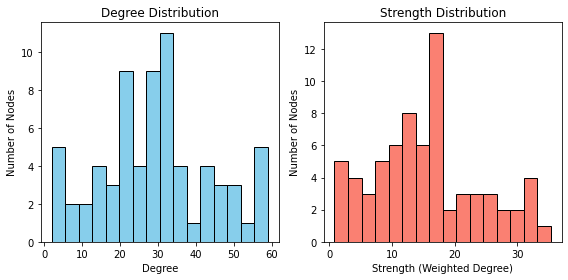

In [25]:
# Compute the degree sequence
degree_sequence = [deg for _, deg in G.degree()]

# Compute the strength (weighted degree) sequence
strength_sequence = [w for _, w in G.degree(weight='weight')]

# Plot histograms
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Degree distribution
axs[0].hist(degree_sequence, bins=16, color='skyblue', edgecolor='black')
axs[0].set_title('Degree Distribution')
axs[0].set_xlabel('Degree')
axs[0].set_ylabel('Number of Nodes')

# Strength distribution
axs[1].hist(strength_sequence, bins=16, color='salmon', edgecolor='black')
axs[1].set_title('Strength Distribution')
axs[1].set_xlabel('Strength (Weighted Degree)')
axs[1].set_ylabel('Number of Nodes')

plt.tight_layout()
plt.show()


<h4><font color="magenta">💻 <strong>Exercise:</strong></font></h4>

> Extract basic statistics (mean, median, standard deviation, min, max) from the **degree** and **strength** sequences computed above.  
> Then, test whether each of these distributions follows a **normal distribution** using the **Shapiro-Wilk test**.
>
> - Use `scipy.stats.shapiro` for normality testing.
> - Discuss whether the observed distributions match the expectations for brain networks.

<details>
<summary>💡 <strong>Hint</strong></summary>

- Use `np.mean`, `np.median`, `np.std`, `np.min`, and `np.max` for basic statistics.
- To perform the Shapiro-Wilk test, use:
  ```python
  stat, p_value = stats.shapiro(sequence)
  ```
  If $p < 0.05$: the distribution deviates significantly from normality. 

</details> <details> <summary>✅ <strong>Solution</strong></summary>
    
```python
# Basic statistics for degree
print("Degree sequence:")
print(f"- Mean: {np.mean(degree_sequence):.2f}")
print(f"- Median: {np.median(degree_sequence)}")
print(f"- Std: {np.std(degree_sequence):.2f}")
print(f"- Min: {np.min(degree_sequence)}")
print(f"- Max: {np.max(degree_sequence)}")

# Normality test for degree
from scipy import stats
stat_deg, p_deg = stats.shapiro(degree_sequence)
print(f"Shapiro-Wilk p-value (degree): {p_deg:.3f}")

# Basic statistics for strength
print("\nStrength sequence:")
print(f"- Mean: {np.mean(strength_sequence):.2f}")
print(f"- Median: {np.median(strength_sequence):.2f}")
print(f"- Std: {np.std(strength_sequence):.2f}")
print(f"- Min: {np.min(strength_sequence):.2f}")
print(f"- Max: {np.max(strength_sequence):.2f}")

# Normality test for strength
stat_str, p_str = stats.shapiro(strength_sequence)
print(f"Shapiro-Wilk p-value (strength): {p_str:.3f}")
````

<h4><font color="gray">💻 <strong>Optional Exercise:</strong></font></h4>

>Analyze the in- and out-degree sequences of a directed graph:
> - Extract the in- and out-degree sequences.
> - Compute and print the basic statistics: min, max, median, mean, and standard deviation.
> - Visualize the degree distribution using histograms.
> - Create a second plot showing the graph with node size and color proportional to degree.
> - Use `np.sum` to check the general property according to which the sum of in-degrees is equal to the sum of out-degrees.
> - (Math fun !) Prove the previous little math result (lemma) using the adjacency matrix.

<details> <summary>✅ <strong>Solution</strong></summary>
    
```python
in_degree_sequence = [d for n, d in G.in_degree()] # n = node, d = degree
out_degree_sequence = [d for n, d in G.out_degree()]

print(f"Min, max, med, mean, std of in-degree sequence:"
  f"{np.min(in_degree_sequence)}, {np.max(in_degree_sequence)}, {np.median(in_degree_sequence)}, "
  f"{np.mean(in_degree_sequence):.2f}, {np.std(in_degree_sequence):.2f}")
print(f"Min, max, med, mean, std of out-degree sequence:"
  f"{np.min(out_degree_sequence)}, {np.max(out_degree_sequence)}, {np.median(out_degree_sequence)}, "
  f"{np.mean(out_degree_sequence):.2f}, {np.std(out_degree_sequence):.2f}")

# Degrees
def draw_degree_distribution(G, title, ax):
    """
    Plot the degree distribution of a directed graph.

    Parameters:
    - G: NetworkX graph (directed)
    - title: str, the title for the graph
    - ax: Matplotlib axis for the degree distribution
    """
    # In-degrees and out-degrees
    in_degree_sequence = [d for n, d in G.in_degree()]
    out_degree_sequence = [d for n, d in G.out_degree()]

    # Determine the bins
    bins = range(max(max(in_degree_sequence), max(out_degree_sequence)) + 2)  # Ensure all values are included

    # Plot Degree Distribution
    ax.hist(in_degree_sequence, bins=bins, alpha=0.4,
            density=False, edgecolor='black', label='In-degree')
    ax.hist(out_degree_sequence, bins=bins, alpha=0.4,
            density=False, edgecolor='black', label='Out-degree')
    ax.set_title(f'Degree Distribution for {title}')
    ax.set_xlabel('Degree')
    ax.set_ylabel('Count')
    ax.legend()

def draw_graph_with_degree(G, title, ax):
    """
    Draw the directed graph with node sizes proportional to their degree.

    Parameters:
    - G: NetworkX graph (directed)
    - title: str, the title for the graph
    - ax: Matplotlib axis for the graph visualization
    """
    # Position nodes using the spring layout
    pos = nx.spring_layout(G, k=0.6)

    # Calculate node sizes based on degrees
    node_sizes = [30 * np.sqrt(d) for _, d in G.degree()]

    # Calculate node colors based on degrees
    node_degrees = np.asarray([G.degree(n) for n in G.nodes()])
    n_color = node_degrees

    # Draw nodes with sizes and colors based on their degree
    nx.draw_networkx_nodes(G, pos, ax=ax, node_size=node_sizes, node_color=n_color, cmap='Oranges', edgecolors='black', linewidths=1)
    nx.draw_networkx_edges(G, pos, ax=ax, edge_color='grey', alpha=0.4)

    ax.set_title(f'{title} with node size proportional to degree')
    ax.axis('off')

    # Add color bar
    sm = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=min(n_color), vmax=max(n_color)))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, fraction=0.03, pad=0.04, shrink=0.3)
    cbar.set_label('Node degree')

# Create subplots for degree distributions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

draw_degree_distribution(G, 'the C. elegans connectome', ax1)

# Create subplots for graph visualizations
draw_graph_with_degree(G, 'C. elegans connectome', ax2)

plt.tight_layout()
plt.show()
```

#### **Degree-preserving random graphs**

Once the degree sequence is known, we can use it to sample **null models**—random graphs that preserve key properties of the observed network, allowing us to test whether other statistics (e.g., clustering, efficiency) are **significantly different** from what would be expected by chance.

This is especially important in neuroscience and other biological domains, where some structural features (like degree heterogeneity) are known to influence many graph measures.

Two common models are:

- **Configuration Model**  
  Generates random graphs that exactly match a given **degree sequence**, but otherwise connect edges randomly. This allows one to isolate the effect of the degree distribution on network measures, without enforcing other properties like clustering or modularity.

- **Directed Configuration Model**  
  Extends the above model to **directed graphs**, preserving both **in-degree** and **out-degree** sequences. This is crucial when directionality carries functional or causal significance (e.g., in neural circuits).

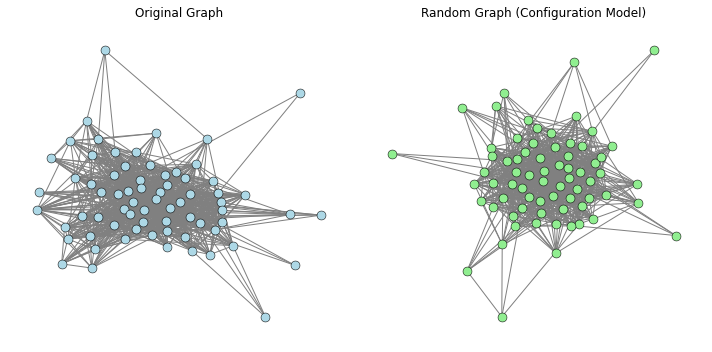

In [26]:
# Generate a random graph with the same degree sequence
degree_sequence = [d for n, d in G.degree()]
random_graph = nx.configuration_model(degree_sequence)

# Convert to simple graph (removes parallel edges and self-loops)
random_graph = nx.Graph(random_graph)
random_graph.remove_edges_from(nx.selfloop_edges(random_graph))

# Create independent layouts
pos_G = nx.spring_layout(G, seed=42)
pos_R = nx.spring_layout(random_graph, seed=24)

# Create figure
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot original graph
nx.draw(G, pos_G, ax=axes[0], node_color='lightblue', edge_color='gray',
        with_labels=False, node_size=80, edgecolors='black', linewidths=0.5)
axes[0].set_title("Original Graph")

# Plot randomized graph
nx.draw(random_graph, pos_R, ax=axes[1], node_color='lightgreen', edge_color='gray',
        with_labels=False, node_size=80, edgecolors='black', linewidths=0.5)
axes[1].set_title("Random Graph (Configuration Model)")

plt.tight_layout()
plt.show()

<h4><font color="magenta">💻 <strong>Exercise:</strong></font></h4>

> - Write a code to check that the **transitivity** of the connectome is higher than that of a graph drawn from the **configuration model** with the same degree sequence.
> - Check that the **densities** of both graphs are approximately the same.

<details>
<summary>💡 <strong>Hint</strong></summary>

- Use `nx.transitivity(G)` to compute the transitivity of a graph.
- Use `nx.density(G)` to compute the density.
- Generate a configuration model with `nx.configuration_model(...)`, then remove self-loops and parallel edges using:
  ```python
  G_random = nx.Graph(G_random)
  G_random.remove_edges_from(nx.selfloop_edges(G_random))

<details> <summary>✅ <strong>Solution</strong></summary>

```python
# Compute transitivity and density of the original graph
T_orig = nx.transitivity(G)
D_orig = nx.density(G)

# Generate a configuration model preserving the degree sequence
degree_sequence = [d for n, d in G.degree()]
G_random = nx.configuration_model(degree_sequence)

# Remove parallel edges and self-loops
G_random = nx.Graph(G_random)
G_random.remove_edges_from(nx.selfloop_edges(G_random))

# Compute transitivity and density of the random graph
T_rand = nx.transitivity(G_random)
D_rand = nx.density(G_random)

# Print results
print(f"Transitivity of original graph: {T_orig:.4f}")
print(f"Transitivity of random graph:   {T_rand:.4f}")
print(f"Density of original graph:      {D_orig:.4f}")
print(f"Density of random graph:        {D_rand:.4f}")

```

<h4><font color="magenta">💻 <strong>Optional Exercise:</strong></font></h4>

> Estimate how **unlikely** it is to observe the transitivity of the connectome under a **degree-preserving null model**.
>
> - Generate **1000 random graphs** using the configuration model (undirected or directed, depending on your connectome).
> - For each graph, compute its **transitivity**.
> - Plot the distribution of these transitivity values and indicate the observed value from the connectome in **red**.
> - Estimate the **p-value**: the proportion of null model graphs with transitivity greater than or equal to the observed one.



<details> <summary>✅ <strong>Solution</strong></summary>

```python

# Observed transitivity
T_obs = nx.transitivity(G)

# Degree sequence
degree_sequence = [d for n, d in G.degree()]

# Generate 1000 random graphs and compute their transitivity
transitivities = []

for _ in range(1000):
    G_rand = nx.configuration_model(degree_sequence)
    G_rand = nx.Graph(G_rand)  # Simplify to simple graph
    G_rand.remove_edges_from(nx.selfloop_edges(G_rand))
    
    T_rand = nx.transitivity(G_rand)
    transitivities.append(T_rand)

# Compute p-value
transitivities = np.array(transitivities)
p_value = np.mean(transitivities >= T_obs)

# Plot
plt.figure(figsize=(6, 4))
plt.hist(transitivities, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(T_obs, color='red', linestyle='dashed', linewidth=2, label='Observed transitivity')
plt.xlabel('Transitivity')
plt.ylabel('Frequency')
plt.title('Null distribution of transitivity')
plt.legend()
plt.tight_layout()
plt.show()

print(f"Observed transitivity: {T_obs:.4f}")
print(f"Mean of null distribution: {np.mean(transitivities):.4f}")
print(f"P-value: {p_value:.4f}")

```

### **3.5 Further graph metrics**

#### **3.5.1 Small-world property**

Typically, connectomes are **small-world**. In Network Science, a small-world graph is characterized by **high clustering** (transitivity) and **low average shortest path length**."

The small-worldness coefficient, often denoted as $\sigma$, quantitatively measures whether a network exhibits small-world properties. It is defined as the ratio of the normalized clustering coefficient and the normalized average shortest path length of a network, compared to those of a random network with similar size and degree distribution:
$$ \sigma = \frac{C/C_{rand}}{L/L_{rand}} $$
where:
- $ C $ is the clustering coefficient of the network.
- $ C_{rand} $ is the average clustering coefficient of a set of random networks with the same number of nodes and edges as the original network.
- $ L $ is the average shortest path length of the network.
- $ L_{rand} $ is the average shortest path length of the corresponding random networks.

A value of $\sigma > 1$ suggests that the network exhibits small-world properties, indicating a balance between high local clustering and short global path lengths compared to random networks. Note that $\sigma$ can only be computed for undirected graphs, so if the graph is directed, it must be first symmetrized before using the function `nx.sigma`.

In [27]:
# Function nx.sigma is too slow. New one defined below.
# # Create an undirected version of G
# G_undirected = nx.Graph(G)
# # Compute the small-worldness coefficient
# small_worldness = nx.sigma(G_undirected, niter=100, nrand=10, seed=None)
# # Print the result
# print(f"Small-worldness coefficient: {small_worldness}")


def small_worldness_coefficient(G, n_iter=32):
    """
    Compute the small-worldness coefficient sigma for a graph G.

    Parameters:
    - G: NetworkX graph
    - n_iter: Number of iterations for random graph generation

    Returns:
    - sigma: Small-worldness coefficient
    """
    # Warn and convert to undirected if needed
    if nx.is_directed(G):
        print("Warning: Graph was converted to undirected to compute small-worldness coefficient.")
        G = G.to_undirected()

    # Check if the graph is connected
    if not nx.is_connected(G):
        print("Graph is not connected. Computing for the largest connected component.")
        # Get the largest connected component
        largest_cc = max(nx.connected_components(G), key=len)
        G = G.subgraph(largest_cc).copy()

    # Compute actual sigma
    n = G.number_of_nodes()
    m = G.number_of_edges()

    # Get degrees for the largest connected component
    degree_sequence = [d for n, d in G.degree()]

    # Calculate average shortest path length for the original graph
    L = nx.average_shortest_path_length(G)

    # Compute average shortest path length for configuration model instances
    L_random = 0
    for _ in range(n_iter):
        # Generate configuration model random graph
        G_random = nx.configuration_model(degree_sequence)

        # Convert to simple graph if G_random is a multigraph
        if G_random.is_multigraph():
            G_random = nx.Graph(G_random)

        # Check if the graph is connected
        if not nx.is_connected(G_random):
            print("Generated random graph is not connected. Skipping iteration.")
            continue

        L_random += nx.average_shortest_path_length(G_random) / n_iter

    # Calculate average clustering coefficient for the original graph
    try:
        C = nx.average_clustering(G)
    except nx.NetworkXError:
        print("Error computing average clustering coefficient for original graph.")
        C = 0

    # Compute average clustering coefficient for configuration model instances
    C_random = 0
    for _ in range(n_iter):
        # Generate configuration model random graph
        G_random = nx.configuration_model(degree_sequence)

        # Convert to simple graph if G_random is a multigraph
        if G_random.is_multigraph():
            G_random = nx.Graph(G_random)

        # Check if the graph is connected
        if not nx.is_connected(G_random):
            print("Generated random graph is not connected. Skipping iteration.")
            continue

        try:
            C_random += nx.average_clustering(G_random) / n_iter
        except nx.NetworkXError:
            print("Error computing average clustering coefficient for random graph.")
            continue

    # Compute sigma
    if L_random == 0 or C_random == 0:
        sigma = 0
    else:
        sigma = (C / C_random) / (L / L_random)

    return sigma


sigma = small_worldness_coefficient(G)
print(f"Small-worldness coefficient sigma: {sigma:.3f}")

Small-worldness coefficient sigma: 1.812


#### **3.5.2 Motifs**

Detecting motifs in complex networks is challenging due to the computational complexity involved in searching for subgraph patterns efficiently. For more robust and scalable motif detection, alternative tools like `graph_tool` in Python offer advanced algorithms and optimizations beyond what is commonly available in NetworkX. Other packages like `igraph` and
`pymfinder` also provide efficient methods for motif discovery in large-scale networks.

#### **3.5.3 Rich-Club Coefficient**
- **Definition**: This measures the tendency of high-degree nodes to be more densely interconnected than expected by chance.
- **Relevance**: In neural networks, a high rich-club coefficient among high-degree nodes suggests a "rich-club" architecture where hub nodes form a cohesive group, crucial for global communication and integration of information.
- **Expectation**: A high rich-club coefficient is expected in brain connectomes, where highly interconnected hub nodes facilitate efficient global integration and coordination across the network.
- **Formula**: The rich-club coefficient is calculated as:
  $$
  \phi(k) = \frac{2E_{>k}}{N_{>k}(N_{>k} - 1)}
  $$
  where $ E_{>k} $ is the number of edges among nodes with degree greater than $ k $, and $ N_{>k} $ is the number of such nodes.

- **Normalization**: To determine whether the observed rich-club coefficient is statistically significant, it should be normalized against a null model. This involves comparing the rich-club coefficient of the actual network to that of a randomized network. The normalized rich-club coefficient is given by:
  $$
  \rho(k) = \frac{\phi(k)}{\phi_{\text{rand}}(k)}
  $$
  where $ \phi_{\text{rand}}(k) $ is the rich-club coefficient of the randomized network. A value of $\rho(k) > 1$ indicates that high-degree nodes are more interconnected than expected by chance, suggesting a significant rich-club organization.

- **Randomized Networks**: To create a meaningful null model, the network is randomized while preserving certain properties, such as the degree distribution. This can be done using methods like degree-preserving randomization or the configuration model. The configuration model generates a randomized network that maintains the same degree sequence as the original network by randomly rewiring edges. This ensures that the observed rich-club phenomenon is not merely a result of the degree distribution but reflects a higher-order organization of the network.

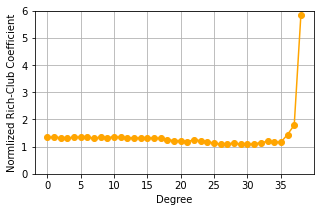

In [28]:
def rich_club_normalized(G, num_randomizations=10):
    """
    Compute the normalized rich-club coefficient of a graph G.

    Parameters:
    - G: NetworkX graph
    - num_randomizations: Number of randomized graphs to generate for averaging

    Returns:
    - normalized_rich_club_coeff: Dictionary keyed by degree with normalized rich-club coefficient values
    """
    # Compute the rich-club coefficients for the original graph
    original_phi = nx.rich_club_coefficient(G, normalized=False)

    # Initialize a dictionary to store the average rich-club coefficients for the randomized graphs
    phi_rand_sum = {k: 0 for k in original_phi.keys()}

    for _ in range(num_randomizations):
        # Create a configuration model graph to preserve the degree distribution
        random_graph = nx.configuration_model([d for n, d in G.degree()])

        # Remove parallel edges and self-loops
        random_graph = nx.Graph(random_graph)
        random_graph.remove_edges_from(nx.selfloop_edges(random_graph))

        # Compute the rich-club coefficients for the randomized graph
        random_phi = nx.rich_club_coefficient(random_graph, normalized=False)

        # Accumulate the rich-club coefficients for averaging
        for k in random_phi.keys():
            phi_rand_sum[k] += random_phi[k]

    # Compute the average rich-club coefficients for the randomized graphs
    phi_rand_avg = {k: phi_rand_sum[k] / num_randomizations for k in phi_rand_sum.keys()}

    # Normalize the rich-club coefficients, avoiding division by zero
    normalized_rich_club_coeff = {}
    for k in original_phi.keys():
        if phi_rand_avg[k] != 0:
            normalized_rich_club_coeff[k] = original_phi[k] / phi_rand_avg[k]
        else:
            normalized_rich_club_coeff[k] = float('inf')  # or you can choose to skip these degrees

    return normalized_rich_club_coeff



# Step 1: Compute the Rich-Club Coefficients
G_undirected = G.to_undirected()
rich_club_coefficient = rich_club_normalized(G_undirected)

# Step 2: Plot the Rich-Club Coefficient
degrees = list(rich_club_coefficient.keys())
coefficients = list(rich_club_coefficient.values())

plt.figure(figsize=(5,3))
plt.plot(degrees, coefficients, marker='o', linestyle='-', color='orange')
plt.ylim(0,6)
plt.xlabel('Degree')
plt.ylabel('Normlized Rich-Club Coefficient')
plt.grid(True)
plt.show()

The first degree for which the rich-club coefficient is larger than 1.2 is: 0

Rich-club nodes (degree >= 0):
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69]


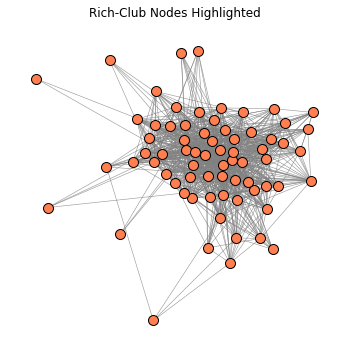

In [29]:
# Step 3: Identify the first degree for which the coefficient is larger than
# the seleted threshold
threshold = 1.2
for degree, coefficient in zip(degrees, coefficients):
    if coefficient > threshold:
        print(f"The first degree for which the rich-club coefficient is larger than {threshold} is: {degree}")
        break


# Step 4: Identify Rich-Club Nodes
degree_threshold = degree # Select a degree threshold, for example, where the rich-club coefficient significantly increases
rich_club_nodes = [node for node, degree in dict(G.degree()).items() if degree >= degree_threshold]

print(f"\nRich-club nodes (degree >= {degree_threshold}):\n", rich_club_nodes)

# Step 5: Plot the original graph with spring layout and highlight the rich-club nodes
# Plot the graph with force-directed info
plt.figure(figsize=(6,6))
pos = nx.spring_layout(G, k=0.5)
nx.draw_networkx_nodes(G, pos, node_size=70, node_color='bisque', edgecolors='black', linewidths=1)
nx.draw_networkx_edges(G, pos, alpha=0.8, edge_color='grey', width=0.6)
nx.draw_networkx_nodes(G, pos, nodelist=rich_club_nodes, node_size=100, node_color='coral', edgecolors='black', linewidths=1)

plt.title('Rich-Club Nodes Highlighted')
plt.axis('off')
plt.show()


For a detailed analysis of the rich club phenomenon in the C. elegans connectome, refer to the comprehensive study by Towlson et al., [published in the Journal of Neuroscience in 2013](https://doi.org/10.1523/JNEUROSCI.3784-12.2013).

#### **3.5.4 Modularity**
   - **Definition**: Modularity quantifies the degree to which the network may be subdivided into clearly defined groups or communities.
   - **Relevance**: High modularity indicates a structure with dense connections between the nodes within modules but sparse connections between nodes in different modules, suggesting specialized processing within tightly knit groups.
   - **Expectation**: High modularity is expected in brain connectomes, where functional segregation into distinct modules supports specialized processing and cognitive functions.
   - **Community Detection Algorithms**: There are many community (module) detection algorithms used to identify these modules within a graph ([Fortunato & Hric 2016](https://doi.org/10.1016/j.physrep.2016.09.002), [Betzel 2023](https://doi.org/10.1016/B978-0-323-85280-7.00016-6)). Two popular ones are:
     - **Greedy Modularity Communities**: This algorithm iteratively merges nodes or smaller communities to maximize modularity, stopping when no further merging increases the modularity score. It can be computationally intensive for large networks.
     - **Louvain Algorithm**: This efficient, two-phase method first assigns each node to its own community and optimizes modularity by moving nodes between communities. It then aggregates the network based on these communities and repeats the process. The algorithm stops when modularity no longer increases. The Louvain algorithm is faster and more scalable, particularly for large networks, due to its hierarchical approach.

The modularity $ Q $ is given by the following equation:
$$ Q = \frac{1}{2m} \sum_{i,j} \left[ A_{ij} - \frac{k_i k_j}{2m} \right] \delta(c_i, c_j) $$
where:
- $ A_{ij} $ is the element of the adjacency matrix $A $.
- $k_i $ and $ k_j $ are the degrees (number of edges) of nodes $ i $ and $ j $, respectively.
- $ m $ is the total number of edges in the network.
- $ \delta(c_i, c_j) $ is the Kronecker delta, which is 1 if nodes $ i $ and $ j $ are in the same community $i.e., $ c_i = c_j $$, and 0 otherwise.
- $ c_i $ and $c_j $ are the communities to which nodes $ i $ and $ j $ belong.

In the code below, we generate and visualize two graphs with different levels of modularity using the Stochastic Block Model (SBM) implemented NetworkX, demonstrating how community structure affects modularity. SBM is a model for generating random graphs with a predefined community structure, where the probability of edge formation depends on the community membership of the nodes.

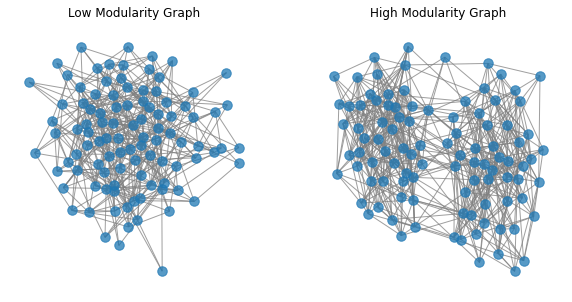

In [30]:
# Two graph generated randomly using SBM
# Define block sizes
n=100
sizes = [50, 50]

# Low modularity SBM graph
p_low = 0.08  # Probability of edges within communities
q_low = 0.08  # Probability of edges between communities
low_modularity_graph = nx.stochastic_block_model(sizes, [[p_low, q_low], [q_low, p_low]])

# High modularity SBM graph
p_high = 0.2
q_high = 0.02
high_modularity_graph = nx.stochastic_block_model(sizes, [[p_high, q_high], [q_high, p_high]])

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(10,5))

# Plot low modularity graph
pos = nx.spring_layout(low_modularity_graph)
nx.draw(low_modularity_graph, pos, ax=axs[0], with_labels=False, node_size=90, edge_color='grey', alpha=0.75)
axs[0].set_title(f'Low Modularity Graph')

# Plot high modularity graph
pos = nx.spring_layout(high_modularity_graph)
nx.draw(high_modularity_graph, pos, ax=axs[1], with_labels=False, node_size=90, edge_color='grey', alpha=0.75)
axs[1].set_title(f'High Modularity Graph')

plt.show()

We now test Louvain and Greedy algoritmms on these two synthetic graphs.

Number of communities: 7
Modularity for the Low modularity using louvain algorithm: 0.2974180345187716

Number of communities: 2
Modularity for the High modularity using louvain algorithm: 0.40576171875



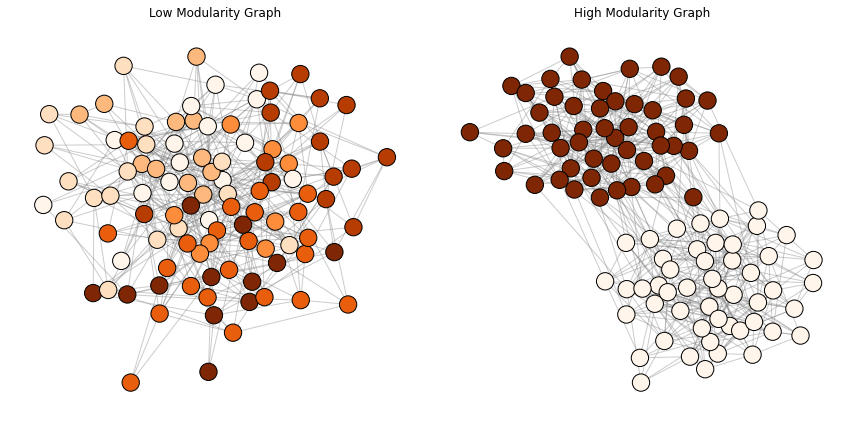

In [31]:
from networkx.algorithms import community
import community.community_louvain as community_louvain #python-louvain package
import warnings

def visualize_modularity(G, title, ax, algorithm='greedy'):
    """
    Visualize the modularity and communities in a graph.

    Parameters:
    - G: NetworkX graph
    - title: str, the title for the graph
    - ax: Matplotlib axis for the graph visualization
    - algorithm: str, the algorithm to use for community detection ('greedy' or 'louvain')
    """
    if algorithm == 'greedy':
        # Identify communities using the greedy modularity communities algorithm
        communities = list(community.greedy_modularity_communities(G))
    elif algorithm == 'louvain':
        if G.is_directed():
            warnings.warn("The Louvain algorithm does not support directed graphs. Converting to undirected graph.")
            G = G.to_undirected()
        # Identify communities using the Louvain algorithm
        partition = community_louvain.best_partition(G)
        print(f"Number of communities: {len(set(partition.values()))}")
        # Create a dictionary to store the communities
        communities = {}
        for node, comm in partition.items():
            communities.setdefault(comm, []).append(node)
        communities = [frozenset(community) for community in communities.values()]
    else:
        raise ValueError("Unsupported algorithm. Use 'greedy' or 'louvain'.")

    # Compute modularity
    modularity = community.modularity(G, communities)
    print(f"Modularity for the {title} using {algorithm} algorithm: {modularity}\n")

    # Create a color map for the communities
    color_map = {}
    for i, community_set in enumerate(communities):
        for node in community_set:
            color_map[node] = i

    # Assign colors to nodes based on their community
    node_colors = [color_map[node] for node in G.nodes()]

    # Position nodes using the spring layout
    pos = nx.spring_layout(G, k=0.4)

    # Draw nodes with community colors
    nx.draw_networkx_nodes(G, pos, ax=ax, node_size=300, cmap=plt.cm.Oranges, node_color=node_colors, edgecolors='black')

    # Draw all edges
    nx.draw_networkx_edges(G, pos, ax=ax, edge_color='grey', alpha=0.4)

    # Draw node labels
    # nx.draw_networkx_labels(G, pos, ax=ax, font_size=10, font_color='black')

    ax.axis('off')  # Hide the axes

    return modularity, node_colors



# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Visualize modularity and communities for the low modularity graph
modularity, node_colors = visualize_modularity(low_modularity_graph, 'Low modularity', ax=axes[0], algorithm='louvain')
axes[0].set_title('Low Modularity Graph')

# Visualize modularity and communities for the high modularity graph
modularity, node_colors = visualize_modularity(high_modularity_graph, 'High modularity', ax=axes[1], algorithm='louvain')
axes[1].set_title('High Modularity Graph')

# Adjust layout
plt.tight_layout()
plt.show()


We're ready to compute the modularity for the zebrafish SC.

Number of communities: 3
Modularity for the Zebrafish SC using louvain algorithm: 0.18478076210295286



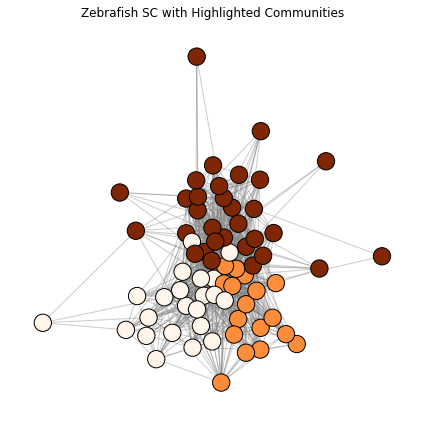

In [32]:
# Create subplots
fig, ax = plt.subplots(figsize=(6, 6))

# Visualize modularity and communities
modularity, node_colors = visualize_modularity(G, 'Zebrafish SC', ax=ax, algorithm='louvain')
plt.title('Zebrafish SC with Highlighted Communities')
plt.tight_layout()
plt.show()

#### **3.5.5 Singular Values and Effective Ranks**

As highlighted in a [recent study](https://www.nature.com/articles/s41567-023-02303-0), the singular values $\sigma_1,\ldots, \sigma_N$ of adjacency matrices in connectomics exhibit rapid decay, indicating a low effective rank.


Singular value decomposition (SVD) is used to compute these values in Python, typically through `numpy.linalg.svd`. The SVD equation is:
$$ A = U \Sigma V^T $$
where $A $ is the adjacency matrix, $ U $ is an orthogonal matrix of left singular vectors, $ \Sigma $ is a diagonal matrix of singular values $ \sigma_i $, and $V^T $is an orthogonal matrix of right singular vectors.

Below, we extract the adjacency matrix of graph $ G $ and compute its singular values. We compare these values with those obtained from randomly generated graphs that preserve the same degrees as $ G $ (using the configuration model). Our analysis reveals that while the singular values of the original graph decrease rapidly, they exhibit a distinct behavior compared to those of randomly generated graphs, highlighting the more complex structure inherent in the original graph.

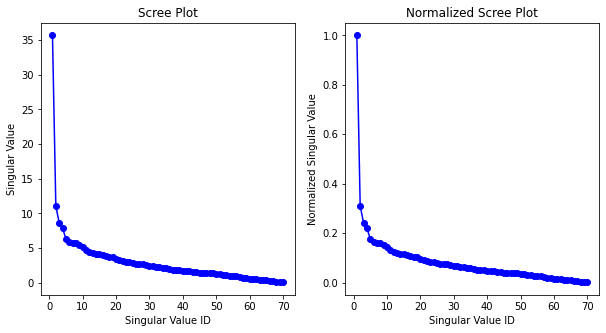

In [33]:
import numpy as np

# Step 1: Extract adjacency matrix
if nx.is_directed(G):
    adj_matrix = nx.to_numpy_array(G, weight='weight', dtype=np.float64)
else:
    adj_matrix = nx.to_numpy_array(G, weight=None, dtype=np.float64)

# Step 2: Compute singular values
singular_values = np.linalg.svd(adj_matrix, compute_uv=False)

# Step 3: Plot the scree plot
# Plotting
fig, axs = plt.subplots(1, 2, figsize=(10,5))
# 1st plot
axs[0].plot(range(1, len(singular_values) + 1), singular_values, marker='o', linestyle='-', color='b')
axs[0].set_title('Scree Plot')
axs[0].set_xlabel('Singular Value ID')
axs[0].set_ylabel('Singular Value')
# 2nd plot
max_singular_value = np.max(singular_values)
norm_singular_values = singular_values/max_singular_value
axs[1].plot(range(1, len(singular_values) + 1), norm_singular_values, marker='o', linestyle='-', color='b')
axs[1].set_title('Normalized Scree Plot')
axs[1].set_xlabel('Singular Value ID')
axs[1].set_ylabel('Normalized Singular Value')
plt.show()

In [34]:
def generate_random_graph_svd(G, num_random_graphs=100):
    """Generate random graphs from configuration model and compute their singular values."""
    singular_values_list = []

    for _ in range(num_random_graphs):
        if nx.is_directed(G):
            # Extract in-degree and out-degree sequences
            in_degree_sequence = [d for n, d in G.in_degree()]
            out_degree_sequence = [d for n, d in G.out_degree()]

            G_random = nx.directed_configuration_model(in_degree_sequence, out_degree_sequence, create_using=nx.DiGraph())
        else:
            # Extract degree sequence for undirected graph
            degree_sequence = [d for n, d in G.degree()]

            G_random = nx.configuration_model(degree_sequence, create_using=nx.Graph())

        # Extract adjacency matrix
        adj_matrix_random = nx.to_numpy_array(G_random, weight='weight' if G.is_directed() else None, dtype=np.float64)

        # Compute singular values and collect them
        singular_values = np.linalg.svd(adj_matrix_random, compute_uv=False)
        singular_values_list.append(singular_values)

    # Compute mean of singular values across all random graphs
    mean_singular_values = np.mean(singular_values_list, axis=0)
    return mean_singular_values

# Step 3: Generate random graphs and compute mean singular values (defaulting to 100 random graphs)
mean_singular_values = generate_random_graph_svd(G, num_random_graphs=10)

#. Step 4: Normalize mean singular values
max_mean_singular_value = np.max(mean_singular_values)
norm_mean_singular_values = mean_singular_values/max_mean_singular_value

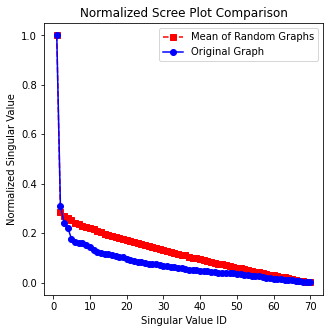

In [35]:
# Plotting
fig, axs = plt.subplots(1, 1, figsize=(5,5))
# Plot mean scree plot of random graphs
axs.plot(range(1, len(mean_singular_values) + 1), norm_mean_singular_values, marker='s', linestyle='--', color='r', label='Mean of Random Graphs')
# Plot original graph's scree plot
axs.plot(range(1, len(singular_values) + 1), norm_singular_values, marker='o', linestyle='-', color='b', label='Original Graph')
axs.set_title('Normalized Scree Plot Comparison')
axs.set_xlabel('Singular Value ID')
axs.set_ylabel('Normalized Singular Value')
axs.legend()
plt.show()

<font color="magenta">**Exercise**</font>
To better understand the role of the largest singular values, compare the normalized singular values of `low_modularity_graph`and `high_modularity_graph`.

We now compute some effective ranks and show that they are all much smaller than the actual rank.

In [36]:
def computeRank(singularValues, tolerance=1e-13):
    return len(singularValues[singularValues > tolerance])


def computeERank(singularValues, tolerance=1e-13):
    """Effective rank based on the definition using spectral entropy
     (https://ieeexplore.ieee.org/document/7098875
      and doi:10.1186/1745-6150-2-2). """
    # We use the convention 0*log(0)=0 so we remove the zero singular values
    singularValues = singularValues[singularValues > tolerance]
    normalizedSingularValues = singularValues / np.sum(singularValues)
    return np.exp(-np.sum(normalizedSingularValues
                          * np.log(normalizedSingularValues)))


def findEffectiveRankElbow(singularValues):
    """Effective rank based on the elbow method."""
    # Coordinates of the diagonal line y = 1 - x  using ax + by + c = 0.
    a, b, c = 1, 1, -1

    # Define normalized axis with first SV at (0,1) and last SV at (1,0).
    x = np.linspace(0, 1, num=len(singularValues))
    y = (singularValues - np.min(singularValues)) /\
        (np.max(singularValues) - np.min(singularValues))

    # See https://en.wikipedia.org/wiki/Distance_from_a_point_to_a_line
    # Line_defined_by_an_equation
    # Distance between the diagonal line y = 1 - x, passing through the
    # largest and the smallest singular value, and the position (x_i, y_i)
    # of the i-th singular value
    distanceToDiagonal = np.abs(a*x + b*y + c) / np.sqrt(a**2 + b**2)

    # Returns the index of the largest distance (rank must be larger than 0).
    elbowPosition = np.argmax(distanceToDiagonal) + 1  # + 1 for indices
    return elbowPosition - 1
    # - 1 to have the effective rank/nb of significant singvals


def computeEffectiveRankEnergyRatio(singularValues, threshold=0.9):
    """Effective rank based on the energy ratio."""
    normalizedCumulSquaredSingularValues = np.cumsum(np.square(singularValues))
    normalizedCumulSquaredSingularValues /= \
        normalizedCumulSquaredSingularValues[-1]
    # Below, this is the min of the argmax. See the note in the documentation
    # of np.argmax: "In case of multiple occurrences of the maximum values,
    # the indices corresponding to the first occurrence are returned."
    return np.argmax(normalizedCumulSquaredSingularValues > threshold) + 1


def computeStableRank(singularValues):
    return np.sum(singularValues*singularValues) / np.max(singularValues)**2


def computeNuclearRank(singularValues):
    return np.sum(singularValues) / np.max(singularValues)



# Compute and print various effective ranks
print("Rank:", computeRank(singular_values))
print("Effective Rank (Entropy):", computeERank(singular_values))
print("Effective Rank (Energy Ratio):", computeEffectiveRankEnergyRatio(singular_values))
print("Effective Rank (Elbow):", findEffectiveRankElbow(singular_values))
print("Nuclear Rank:", computeNuclearRank(singular_values))
print("Stable Rank:", computeStableRank(singular_values))

Rank: 70
Effective Rank (Entropy): 40.80099640227126
Effective Rank (Energy Ratio): 17
Effective Rank (Elbow): 4
Nuclear Rank: 5.955506826524353
Stable Rank: 1.606004512170403


#### <font color="magenta">**3.5.6 Exercise**</font>
Perform all the previous analyses for the structural connectomes of the mouse and the larval Drosophila.

##### **Mesoscale SC of the mouse brain**

The mesoscopic connectome of the mouse, as mapped by the Allen Institute and reported by ([Oh et al. 2014](https://doi.org/10.1038/nature13186)), provides a detailed and high-resolution map of neural connections. It features 426 nodes (or 213 nodes, representing symmetric pairs of brain regions) and 8820 directed edges, highlighting both low-degree and high-degree nodes. The study found that nodes with lower degrees had higher clustering coefficients and identified a power-law relationship between these properties. Using this data, a generative model was developed based on proximal attachment and source growth principles, successfully replicating the structural features of the connectome, indicating the importance of spatial embedding and node growth in brain connectivity.

In [37]:
import urllib.request

# URL of the text file
url = "https://github.com/VinceThi/low-rank-hypothesis-complex-systems/raw/v1.0.0/graphs/graph_data/connectomes/ABA_weight_mouse.txt"

# Load the data from the URL into a numpy array
with urllib.request.urlopen(url) as f:
    adj_matrix = np.loadtxt(f).astype(float)

# Create a directed graph from the matrix (assuming it represents connectivity)
G_mouse = nx.DiGraph(adj_matrix)

# Example: Print basic graph information
print(f"Number of nodes: {G_mouse.number_of_nodes()}")
print(f"Number of edges: {G_mouse.number_of_edges()}")
print(f"Density: {nx.density(G_mouse)}")
print(f"Weakly connected: {nx.is_weakly_connected(G_mouse)}")
print(f"Strongly connected: {nx.is_strongly_connected(G_mouse)}")

Number of nodes: 213
Number of edges: 1947
Density: 0.043117193728408186
Weakly connected: True
Strongly connected: False


##### **Microscopic SC of the larval drosophila**

A complete brain connectome of the larva of the fruit fly Drosophila melanogaster as recently published in [this paper]( https://doi.org/10.1126/science.add9330). Nodes are neurons and edges are synaptic connections.

In [38]:
import requests     # For making HTTP requests, used here to download the ZIP file from a URL
import zipfile      # For handling ZIP files, used here to extract contents from the downloaded ZIP file
import io           # Provides core tools for working with streams of data, used here for handling file content as a string
import pandas as pd # Provides data structures and data analysis tools, used here to work with tabular data (DataFrame)


# URL of the ZIP file
zip_url = "https://networks.skewed.de/net/fly_larva/files/fly_larva.csv.zip"

# Download the ZIP file
response = requests.get(zip_url)

# Check if the download was successful
if response.status_code == 200:
    # Extract the contents of the ZIP file
    with zipfile.ZipFile(io.BytesIO(response.content)) as zf:
        # Check if 'edges.csv' exists in the ZIP file
        if 'edges.csv' in zf.namelist():
            # Open 'edges.csv' and read it into a Pandas DataFrame
            with zf.open('edges.csv') as csv_file:
                # Read CSV content as string
                csv_content = csv_file.read().decode('utf-8')

                # Split into lines
                lines = csv_content.splitlines()

                # Remove '# ' from the beginning of the first line
                if lines[0].startswith('# '):
                    lines[0] = lines[0][2:]

                # Join lines back into a single string
                csv_content_processed = '\n'.join(lines)

                # Read processed CSV content into DataFrame
                df_edges = pd.read_csv(io.StringIO(csv_content_processed), skipinitialspace=True)

                # Rename columns to remove leading spaces or characters
                df_edges.rename(columns={'# source': 'source', ' target': 'target', ' value': 'value'}, inplace=True)

        else:
            print("edges.csv not found in the ZIP file.")
else:
    print(f"Failed to download ZIP file. Status code: {response.status_code}")

# Display the DataFrame to verify
df_edges

,source,target,count,etype
0,0,1,1,da
1,0,2,1,da
2,0,3,1,da
3,0,4,3,da
4,0,5,1,da
...,...,...,...,...
116917,2951,1431,2,ad
116918,2951,553,1,ad
116919,2951,1749,2,ad
116920,2951,2227,3,ad


In [39]:
# Create a directed graph (DiGraph)
G_drosophila = nx.DiGraph()

# Add edges from DataFrame
for _, row in df_edges.iterrows():
    source = int(row['source'])  # Convert to int assuming nodes are represented as integers
    target = int(row['target'])  # Convert to int assuming nodes are represented as integers
    weight = float(row['count'])  # Convert to float assuming weights are represented as floats

    G_drosophila.add_edge(source, target, weight=weight)

# Count nodes and edges, measure density
num_nodes = G_drosophila.number_of_nodes()
num_edges = G_drosophila.number_of_edges()
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")


Number of nodes: 2952
Number of edges: 110677


## <font color="blue"> **4. Functional Connectivity** </font>

Functional connectomes are maps that detail how different parts of the brain interact and coordinate activity, providing a dynamic framework for understanding brain function and communication.

### **4.1 Relationship with Graphs**
Functional connectomes are commonly represented as **graphs** in the field of network neuroscience. In this representation:

- **Vertices** (or nodes) represent the functional components of the brain, such as individual neurons, clusters of neurons, or whole brain regions, depending on the scale of the connectome.
- **Edges** (or links) represent the functional connections between these nodes, typically assessed by measures of statistical dependence, such as **Pearson correlation**. Pearson correlation quantifies the degree to which the activity patterns of two nodes co-vary over time, indicating the strength of their functional connectivity.

#### **Functional connectome extraction**

To extract a **functional connectome (FC)** from time series data matrix $ N\times T $, where $N$ is the number of nodes and $T$ is the number of time steps, Pearson correlation coefficients are computed between each pair of nodes. These coefficients form an $N\times N$ matrix that quantifies the strength of functional connectivity between nodes, providing insights into network interactions over time. Visualization and analysis of this connectome help characterize network dynamics and organization in complex systems like brain networks.

To assess the **structure-function coupling**, we can calculate the Pearson correlation between the vectorized forms of the structural connectivity (SC) and functional connectivity (FC) matrices. This correlation quantifies how closely the anatomical connections align with the dynamic functional interactions within the network.

### **4.2 Functional dataset from Paul De Koninck's Lab**

#### **4.2.1 Experimental Setup**

Resonant-scanning two-photon microscopy was used to capture brain-wide neuronal activity at single-cell resolution in transgenic zebrafish larvae (Tg(elavl3:H2B-GCaMP6s)), with **22 larvae** aged 5-7 days post-fertilization (dpf). Larvae were immobilized in low-melting point agarose, and tail movements were tracked by a high-speed infrared camera. During the experiment, larvae were exposed to **static whole-field illumination for 10 minutes**, followed by **abrupt dark transitions (dark flashes) over 3 minutes**.

A piezo-driven objective rapidly acquired nuclear signals across 21 imaging planes, covering the entire larval brain except the most ventral neuronal populations. Imaging volumes were registered to the mapZebrain brain atlas using ANTs registration, transforming the coordinates of all neuronal nuclei into the atlas coordinate system. Neurons were assigned to one of **70 anatomical brain regions**. Five regions were excluded due to inconsistent sampling or absence of labeled nuclei. In total, the activity of approximately 54,464 neurons across 65 brain regions was recorded, representing roughly half of the neuronal population at this developmental stage.

#### **4.2.2 Dataset: Activity of 70 Brain Regions in 22 Larval Zebrafish**

The time series data of all neurons were first converted to $\Delta F / F_0$ and then averaged by region. As a result, regional signals might not have a baseline of 0 because the averaging reflects a non-zero mean activity.

Notes:
1. **Visual Stimulation**: Visual stimulation begins at approximately $t=660$ (time steps). For spontaneous activity, consider using data before $t=600$. To analyze correlations reflecting the stimulation, use data after t=600.
2. **Region Inclusion**: Although data for all 70 regions are kept, several larvae do not sample all regions. To reduce the arrays to 65 regions, use `excluded_regions.npy` with `np.delete(timeseries, excluded_regions, axis=0)`.
3. **Under-sampling**: Even after excluding the 5 regions, some larvae may still have under-sampled regions. The exclusion criterion was to retain only the regions imaged in more than 50% of the larvae. Thus, when generating correlation matrices or other statistical measures across all larvae, NaNs might appear due to rows of zeros. This issue can be circumvented by applying `np.nanmean` across the matrices to obtain an average functional connectivity (FC) matrix, where each pixel has a different denominator based on the number of samples.
4. **Filtering**: Applying a Gaussian filter (e.g., `from scipy.ndimage import gaussian_filter1d`, with `sigma=2`) on the time series is recommended. This approach yields more refined correlations, suggesting that low-frequency content might be more crucial for detecting functional interactions.

Below, we download the time series for Fish 6, slightly smooth them with a Gaussian filter, and visualize them using a heatmap and a ridgeline plot.

In [40]:
from scipy.ndimage import gaussian_filter1d

# Define expected local path 
local_path = '../data/zebrafish/timeseries_regions_fish6.npy'

# Define fallback URL (raw GitHub file for Colab or other environments)
url = 'https://github.com/pdesrosiers/brain-connectivity-and-dynamics/raw/main/data/zebrafish/timeseries_regions_fish6.npy'
region_names = 'region_names.npy'  # Name to use if downloading

# Try loading locally
try:
    timeseries6 = np.load(local_path, allow_pickle=True)
    print("✅ Loaded time series from local file.")
except FileNotFoundError:
    print("⚠️ Local file not found. Attempting to download from GitHub...")
    import urllib.request
    urllib.request.urlretrieve(url, downloaded_filename)
    timeseries6 = np.load(downloaded_filename, allow_pickle=True)
    print("✅ Downloaded and loaded time series from GitHub.")


# Check shape
print("Data shape:", timeseries6.shape)

# Apply Gaussian smoothing along the time axis (axis=1)
sigma = 1  # You can adjust this parameter
smoothed_timeseries6 = gaussian_filter1d(timeseries6, sigma=sigma, axis=1)

✅ Loaded time series from local file.
Data shape: (70, 892)


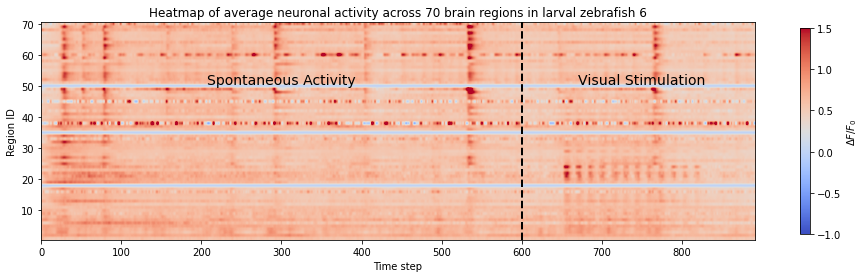

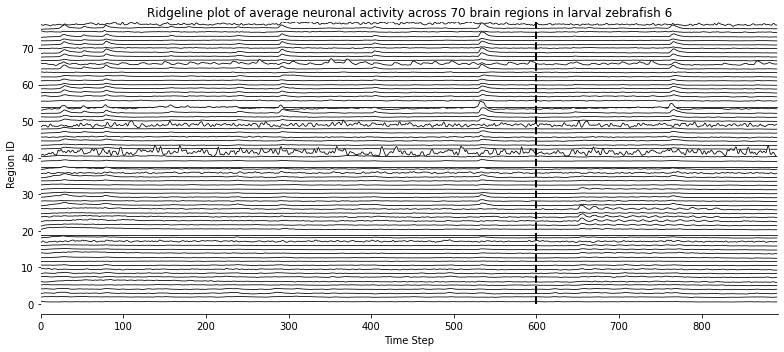

In [41]:
# Plot the time series as a heatmap
plt.figure(figsize=(16,4))
# Plot matrix as an image
plt.imshow(smoothed_timeseries6[::-1], cmap='coolwarm', vmin=-1, vmax=1.5, aspect='auto')
# Add vertical dashed line
plt.axvline(x=600, color='k', linestyle='--', linewidth=2)
# Add text annotations
plt.text(300, 18, 'Spontaneous Activity', horizontalalignment='center', verticalalignment='center', fontsize=14)
plt.text(750, 18, 'Visual Stimulation', horizontalalignment='center', verticalalignment='center', fontsize=14)
plt.xlabel('Time step')
plt.ylabel('Region ID')
plt.yticks(
    ticks=np.arange(len(smoothed_timeseries6))[::10],
    labels=np.arange(len(smoothed_timeseries6), 0, -1)[::10]
)
plt.colorbar(label='$\Delta F / F_0$', shrink=0.95)
plt.title('Heatmap of average neuronal activity across 70 brain regions in larval zebrafish 6')
plt.show()

# Define the offset between each time series for better visualization
offset = 1.1

# Plot each time series with an offset and fill the area below each curve in reverse order
plt.figure(figsize=(11, 5))
for i in range(len(smoothed_timeseries6) - 1, -1, -1):  # Reverse order
    row = smoothed_timeseries6[i]
    plt.plot(row + i * offset, label=f'Region {i+1}', c='k', linewidth=0.8, zorder=len(smoothed_timeseries6) - i)
    plt.fill_between(np.arange(row.size), i * offset, row + i * offset,
                     alpha=0.9, color='white', zorder=len(smoothed_timeseries6) - i - 1)  # Adjust zorder

plt.title('Ridgeline plot of average neuronal activity across 70 brain regions in larval zebrafish 6')
plt.xlabel('Time Step')
plt.ylabel('Region ID')

# Add a vertical dashed line at time step 600
plt.axvline(x=600, color='k', linestyle='--', linewidth=2, zorder=len(smoothed_timeseries6) + 1)

# Remove the top and right spines (box)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_position(('outward', 10))  # Adjust the position of the bottom spine

# Set y-axis limits
#plt.ylim(0, (len(smoothed_timeseries6) - 1) * offset + 2)
plt.ylim(0, len(smoothed_timeseries6) * offset)
plt.xlim(0, smoothed_timeseries6.shape[1])  # Replace -50 by desired margin
plt.tight_layout()
plt.show()



#### **4.2.3 Extraction of Functional Connectivity (FC)**
We will now separate the time series into two parts: spontaneous activity and activity under visual stimulation. This will allow us to define two functional connectomes and compare their topological properties.

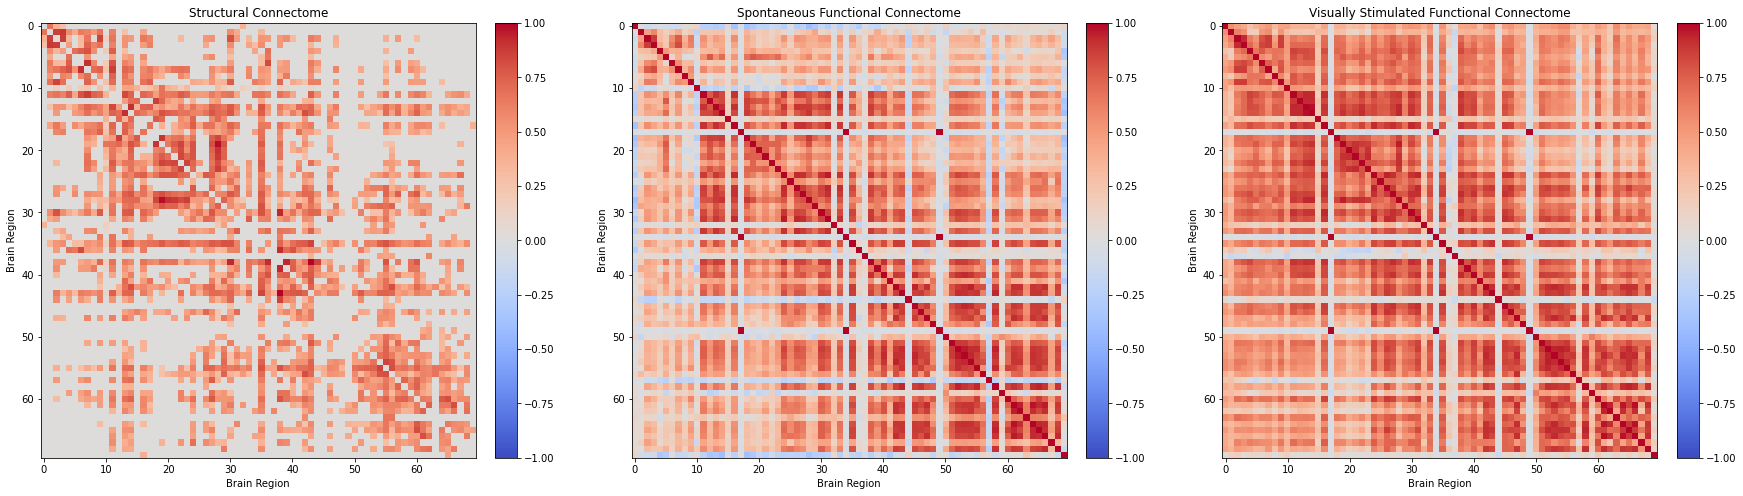

In [42]:
# Add tiny noise to constant rows to avoid division by zero in np.corrcoef
stds = np.std(smoothed_timeseries6, axis=1)
constant_rows = stds < 1e-10
smoothed_timeseries6[constant_rows] += np.random.normal(0, 1e-8, smoothed_timeseries6.shape[1])

# Separate spontaneous and visually stimulated activity
spontaneous_activity = smoothed_timeseries6[:, :600]
stimulated_activity = smoothed_timeseries6[:, 600:]

# Compute correlation matrices directly
spontaneous_FC = np.corrcoef(spontaneous_activity)
stimulated_FC = np.corrcoef(stimulated_activity)

# Plot results
fig, axes = plt.subplots(1, 3, figsize=(30, 8))

# Structural connectome
im0 = axes[0].imshow(adjacency_matrix, cmap='coolwarm', vmin=-1, vmax=1)
axes[0].set_title('Structural Connectome')
axes[0].set_xlabel('Brain Region')
axes[0].set_ylabel('Brain Region')

# Spontaneous functional connectome
im1 = axes[1].imshow(spontaneous_FC, cmap='coolwarm', vmin=-1, vmax=1)
axes[1].set_title('Spontaneous Functional Connectome')
axes[1].set_xlabel('Brain Region')
axes[1].set_ylabel('Brain Region')

# Stimulated functional connectome
im2 = axes[2].imshow(stimulated_FC, cmap='coolwarm', vmin=-1, vmax=1)
axes[2].set_title('Visually Stimulated Functional Connectome')
axes[2].set_xlabel('Brain Region')
axes[2].set_ylabel('Brain Region')

# Add colorbars
fig.colorbar(im0, ax=axes[0], fraction=0.046, pad=0.04)
fig.colorbar(im1, ax=axes[1], fraction=0.046, pad=0.04)
fig.colorbar(im2, ax=axes[2], fraction=0.046, pad=0.04)

plt.show()


#### **4.2.4 Structure-Function Relationship**

We will now compare the zebrafish SC at mesoscale with the two FCs we extracted.

We compute the structure-function coupling by evaluating how well the structural connectivity (SC) matrix aligns with functional connectivity (FC) matrices (both spontaneous and stimulated). The steps are:

1. **Extract upper triangles**: Only the upper triangle of each connectivity matrix (excluding the diagonal) is used to avoid redundancy from symmetric matrices. This can be acheived using the function below. During the extraction, the $N\times N$ connectivity matrix becomes a **vector** with $N(N-1)/2$ elements. 
```python
# Extract the upper triangle values excluding the diagonal
def get_upper_triangle(matrix):
    return matrix[np.triu_indices_from(matrix, k=1)] 
``` 
2. **Compute pearson correlation**: The correlation between the SC and FC values is computed usin `np.corrcoef` as a measure of structure-function coupling:
   - Between vectorized SC and spontaneous FC
   - Between vectorized SC and stimulated FC

3. **Visualize coupling**: Scatter plots vectorized SC and FC values show the relationship.

A higher correlation indicates stronger structure-function coupling, meaning that large values of structural connectivity tend to be associated with large values of functional connectivity, and low values with low values.


<h4><font color="magenta">💻 <strong>Exercise:</strong></font></h4>

Perfom an structure-function coupling analysis as follows:

1. Use the provided function `get_upper_triangle(matrix)` to extract the upper triangle (excluding the diagonal) of the following matrices:
   - `adjacency_matrix` (structural connectivity)
   - `spontaneous_FC` (functional connectivity in spontaneous condition)
   - `stimulated_FC` (functional connectivity in stimulated condition)

2. Compute the Pearson correlation coefficient between SC and each FC matrix using `np.corrcoef`.

3. Create two scatter plots showing:
   - Spontaneous FC vs SC
   - Stimulated FC vs SC
   Include axis labels and annotate each plot with the correlation value in the title.


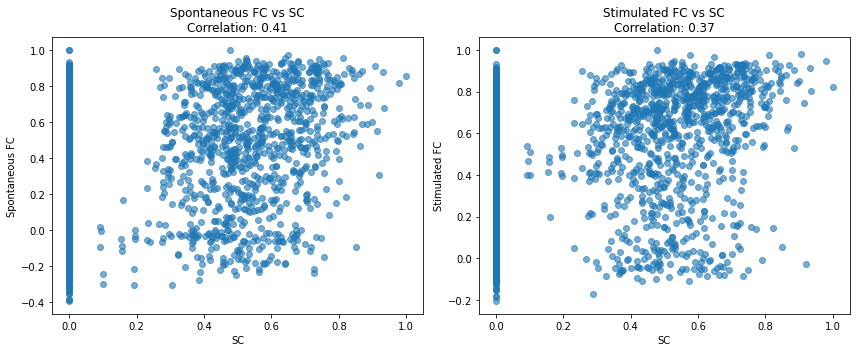

In [43]:
def get_upper_triangle(matrix):
    return matrix[np.triu_indices_from(matrix, k=1)]

# Extract upper triangle values
sc_upper = get_upper_triangle(adjacency_matrix)
spontaneous_fc_upper = get_upper_triangle(spontaneous_FC)
stimulated_fc_upper = get_upper_triangle(stimulated_FC)

# Compute correlations
corr_spontaneous = np.corrcoef(sc_upper, spontaneous_fc_upper)[0, 1]
corr_stimulated = np.corrcoef(sc_upper, stimulated_fc_upper)[0, 1]

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].scatter(sc_upper, spontaneous_fc_upper, alpha=0.6)
axes[0].set_title(f'Spontaneous FC vs SC\nCorrelation: {corr_spontaneous:.2f}')
axes[0].set_xlabel('SC')
axes[0].set_ylabel('Spontaneous FC')

axes[1].scatter(sc_upper, stimulated_fc_upper, alpha=0.6)
axes[1].set_title(f'Stimulated FC vs SC\nCorrelation: {corr_stimulated:.2f}')
axes[1].set_xlabel('SC')
axes[1].set_ylabel('Stimulated FC')

plt.tight_layout()
plt.show()

</details> <details> <summary>✅ <strong>Solution</strong></summary>
    
```python
def get_upper_triangle(matrix):
    return matrix[np.triu_indices_from(matrix, k=1)]

# Extract upper triangle values
sc_upper = get_upper_triangle(adjacency_matrix)
spontaneous_fc_upper = get_upper_triangle(spontaneous_FC)
stimulated_fc_upper = get_upper_triangle(stimulated_FC)

# Compute correlations
corr_spontaneous = np.corrcoef(sc_upper, spontaneous_fc_upper)[0, 1]
corr_stimulated = np.corrcoef(sc_upper, stimulated_fc_upper)[0, 1]

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].scatter(sc_upper, spontaneous_fc_upper, alpha=0.6)
axes[0].set_title(f'Spontaneous FC vs SC\nCorrelation: {corr_spontaneous:.2f}')
axes[0].set_xlabel('SC')
axes[0].set_ylabel('Spontaneous FC')

axes[1].scatter(sc_upper, stimulated_fc_upper, alpha=0.6)
axes[1].set_title(f'Stimulated FC vs SC\nCorrelation: {corr_stimulated:.2f}')
axes[1].set_xlabel('SC')
axes[1].set_ylabel('Stimulated FC')

plt.tight_layout()
plt.show()

```

<h4><font color="magenta">💻 <strong>Optional exercise:</strong></font></h4>

In the previous exercise, all connections—including those with zero strength—were included when computing structure-function coupling. In this exercise, you will refine that analysis by considering only nonzero connections.

1. Using the previously extracted upper triangle vectors (`sc_upper`, `spontaneous_fc_upper`, and `stimulated_fc_upper`), identify the indices where **all three vectors** are nonzero.

2. Create new filtered arrays that include only these nonzero entries.

3. Recompute the correlation coefficients using the filtered data and compare them with the original values.

4. Create new scatter plots for the filtered data and interpret whether structure-function coupling becomes stronger or weaker when considering only existing connections.



<details>
<summary>💡 <strong>Hint</strong></summary>
Use logical indexing with NumPy:  
`nonzero_indices = (sc_upper != 0) & (spontaneous_fc_upper != 0)`  
Then filter with:  
`filtered_sc_upper = sc_upper[nonzero_indices]`  
You can use similar logic for `stimulated_fc_upper`.

</details> <details> <summary>✅ <strong>Solution</strong></summary>
    
```python
# Filter out zero values in SC
nonzero_indices = (sc_upper != 0) & (spontaneous_fc_upper != 0) & (stimulated_fc_upper != 0)
filtered_sc_upper = sc_upper[nonzero_indices]
filtered_spontaneous_fc_upper = spontaneous_fc_upper[nonzero_indices]
filtered_stimulated_fc_upper = stimulated_fc_upper[nonzero_indices]

# Compute correlation coefficients
corr_spontaneous = np.corrcoef(filtered_sc_upper, filtered_spontaneous_fc_upper)[0, 1]
corr_stimulated = np.corrcoef(filtered_sc_upper, filtered_stimulated_fc_upper)[0, 1]

# Create scatter plots
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Scatter plot for spontaneous FC vs SC
axes[0].scatter(filtered_sc_upper, filtered_spontaneous_fc_upper, alpha=0.6)
axes[0].set_xlabel('Structural Connectivity')
axes[0].set_ylabel('Spontaneous Functional Connectivity')
axes[0].set_title(f'Spontaneous FC vs SC\nCorrelation Coefficient: {corr_spontaneous:.2f}')

# Scatter plot for stimulated FC vs SC
axes[1].scatter(filtered_sc_upper, filtered_stimulated_fc_upper, alpha=0.6)
axes[1].set_xlabel('Structural Connectivity')
axes[1].set_ylabel('Stimulated Functional Connectivity')
axes[1].set_title(f'Stimulated FC vs SC\nCorrelation Coefficient: {corr_stimulated:.2f}')

# Show the plots
plt.show()
````

#### **4.2.5 Function-Distance Relationship**

Close brain regions are often more likely to be structurally connected and to exhibit synchronized activity. This spatial organization suggests that both structural and functional connectivity tend to decrease with distance. We will now test this hypothesis by computing the Pearson correlation coefficient between inter-node distance and both types of connectivity.


<h4><font color="magenta">💻 <strong>Exercise:</strong></font></h4>

Compute the pairwise spatial distances between brain regions (or nodes), based on their 3D coordinates.

1. Extract the 3D coordinates of the first $N=70$ nodes from the array `xyz`, which is of shape (140,3).  
   Store the result in a variable called `coords`.

2. Initialize an empty $N \times N$ matrix called `distance_matrix`, where \(N = 70\), using:
   ```python
   distance_matrix = np.zeros((70, 70))
   ```
3. Using nested for loops, compute the Euclidean distance between each pair of nodes $(i,j)$, and store the result in `distance_matrix[i, j]`.

4. Normalize the distance matrix by dividing all values by the maximum distance, so that all entries lie in the range $[0, 1]$.


In [44]:
# Extract the node coordinates into a NumPy array
coords = xyz[0:70,:]#np.array(list(xy_dic.values()))

# Compute the distance matrix
distance_matrix = np.linalg.norm(coords[:, np.newaxis, :] - coords[np.newaxis, :, :], axis=2)


# # Slow but eaasy solution
# # Initialize the distance matrix
# n_nodes = coords.shape[0]
# distance_matrix = np.zeros((n_nodes, n_nodes))

# # Compute Euclidean distances using nested loops
# for i in range(n_nodes):
#     for j in range(n_nodes):
#         distance_matrix[i, j] = np.linalg.norm(coords[i] - coords[j])

# Normalize the distance matrix to [0, 1]
distance_matrix /= distance_matrix.max()

# Get the upper triangle values in the distance matrix
distance_matrix_upper = get_upper_triangle(distance_matrix)

<details>
<summary>💡 <strong>Hint</strong></summary>
Use `np.linalg.norm(coords[i] - coords[j])` to compute the distance between two nodes and `distance_matrix.max()` to normlize.

</details> <details> <summary>✅ <strong>Solution</strong></summary>
    
```python
# Extract the node coordinates into a NumPy array
coords = xyz[0:70,:]#np.array(list(xy_dic.values()))

# Compute the distance matrix
distance_matrix = np.linalg.norm(coords[:, np.newaxis, :] - coords[np.newaxis, :, :], axis=2)


# # Slow but eaasy solution
# # Initialize the distance matrix
# n_nodes = coords.shape[0]
# distance_matrix = np.zeros((n_nodes, n_nodes))

# # Compute Euclidean distances using nested loops
# for i in range(n_nodes):
#     for j in range(n_nodes):
#         distance_matrix[i, j] = np.linalg.norm(coords[i] - coords[j])

# Normalize the distance matrix to [0, 1]
distance_matrix /= distance_matrix.max()

# Get the upper triangle values in the distance matrix
distance_matrix_upper = get_upper_triangle(distance_matrix)
```


<h4><font color="magenta">💻 <strong>Exercise:</strong></font></h4>
Examine whether functional connectivity tends to decrease with spatial distance between brain regions.

1. Use the function `get_upper_triangle` to extract the upper triangle (excluding the diagonal) of the `distance_matrix`, `spontaneous_FC`, and `stimulated_FC`. Store them in:
   - `distance_matrix_upper`
   - `spontaneous_fc_upper`
   - `stimulated_fc_upper`

2. Compute the Pearson correlation coefficient between:
   - `distance_matrix_upper` and `spontaneous_fc_upper`
   - `distance_matrix_upper` and `stimulated_fc_upper`

3. Create two scatter plots:
   - One for spontaneous FC vs. distance
   - One for stimulated FC vs. distance

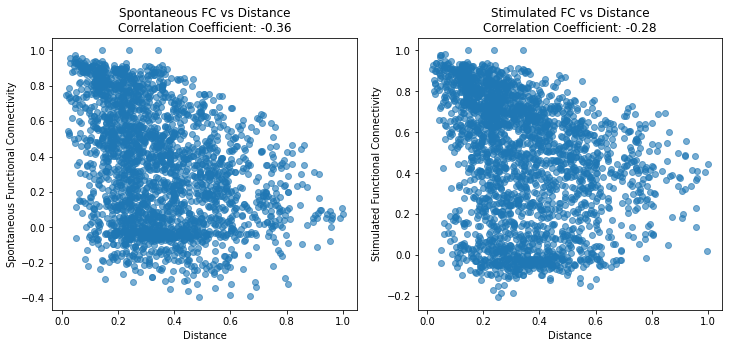

In [45]:
# Compute correlation coefficients
corr_spontaneous = np.corrcoef(distance_matrix_upper, spontaneous_fc_upper)[0, 1]
corr_stimulated = np.corrcoef(distance_matrix_upper, stimulated_fc_upper)[0, 1]

# Create scatter plots
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Scatter plot for spontaneous FC vs SC
axes[0].scatter(distance_matrix_upper, spontaneous_fc_upper, alpha=0.6)
axes[0].set_xlabel('Distance')
axes[0].set_ylabel('Spontaneous Functional Connectivity')
axes[0].set_title(f'Spontaneous FC vs Distance\nCorrelation Coefficient: {corr_spontaneous:.2f}')

# Scatter plot for stimulated FC vs SC
axes[1].scatter(distance_matrix_upper, stimulated_fc_upper, alpha=0.6)
axes[1].set_xlabel('Distance')
axes[1].set_ylabel('Stimulated Functional Connectivity')
axes[1].set_title(f'Stimulated FC vs Distance\nCorrelation Coefficient: {corr_stimulated:.2f}')

# Show the plots
plt.show()

</details> <details> <summary>✅ <strong>Solution</strong></summary>
    
```python
# Extract upper triangle values (excluding diagonal)
distance_matrix_upper = get_upper_triangle(distance_matrix)
spontaneous_fc_upper = get_upper_triangle(spontaneous_FC)
stimulated_fc_upper = get_upper_triangle(stimulated_FC)

# Compute Pearson correlation coefficients
corr_spontaneous = np.corrcoef(distance_matrix_upper, spontaneous_fc_upper)[0, 1]
corr_stimulated = np.corrcoef(distance_matrix_upper, stimulated_fc_upper)[0, 1]

# Create scatter plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot for spontaneous FC vs distance
axes[0].scatter(distance_matrix_upper, spontaneous_fc_upper, alpha=0.6)
axes[0].set_xlabel('Distance')
axes[0].set_ylabel('Spontaneous Functional Connectivity')
axes[0].set_title(f'Spontaneous FC vs Distance\nCorrelation Coefficient: {corr_spontaneous:.2f}')

# Scatter plot for stimulated FC vs distance
axes[1].scatter(distance_matrix_upper, stimulated_fc_upper, alpha=0.6)
axes[1].set_xlabel('Distance')
axes[1].set_ylabel('Stimulated Functional Connectivity')
axes[1].set_title(f'Stimulated FC vs Distance\nCorrelation Coefficient: {corr_stimulated:.2f}')

# Show plots
plt.tight_layout()
plt.show()
```

### **4.3 Further analysis (optional)**

The previous correlations are quite low, but they only concern one zebrafish. Use the following dataset to compute the spontaneous and stimulated FCs for each of the 22 fish, and then average these FCs and compare them to the SC. Does the coupling between the FCs and SC get stronger?

In [46]:
# # Step 1: Mount Google Drive (optional)
# from google.colab import drive
# drive.mount('/content/drive')

# # Step 2: Define a function to download and load each .npy file
# def load_and_smooth_timeseries(file_num, sigma=2):
#     file_url = f'https://github.com/pdesrosiers/public_data/raw/main/zebrafish_functional_data/timeseries_regions_fish{file_num}.npy'
#     file_path = f'/content/timeseries_regions_fish{file_num}.npy'

#     # Download the file
#     !wget {file_url} -O {file_path}

#     # Load the file
#     timeseries = np.load(file_path)

#     # Apply Gaussian smoothing
#     smoothed_timeseries = gaussian_filter1d(timeseries, sigma=sigma, axis=1)

#     return smoothed_timeseries

# # Step 3: Load and smooth all timeseries data from fish 1 to 22
# all_smoothed_timeseries = []
# for i in range(1, 23):
#     smoothed_timeseries = load_and_smooth_timeseries(i, sigma=2)
#     all_smoothed_timeseries.append(smoothed_timeseries)
#     print(f'\nLoaded and smoothed timeseries for fish {i} with shape {smoothed_timeseries.shape}\n')

# # Define the function to split the timeseries matrix
# def split_timeseries(matrix, split_time_step):
#     spontaneous_activity = matrix[:, :split_time_step]
#     stimulated_activity = matrix[:, split_time_step:]
#     return spontaneous_activity, stimulated_activity

# # Define the function to split all timeseries in a list
# def split_all_timeseries(matrix_list, split_time_step):
#     all_spontaneous_activities = []
#     all_stimulated_activities = []

#     for matrix in matrix_list:
#         spontaneous_activity, stimulated_activity = split_timeseries(matrix, split_time_step)
#         all_spontaneous_activities.append(spontaneous_activity)
#         all_stimulated_activities.append(stimulated_activity)

#     return all_spontaneous_activities, all_stimulated_activities

# # Apply the split function to all matrices
# split_time_step = 600
# all_spontaneous_activities, all_stimulated_activities = split_all_timeseries(all_smoothed_timeseries, split_time_step)

# # Compute functional connectomes from a list of time series
# def compute_connectomes(activity_list):
#     connectomes = []
#     for activity in activity_list:
#         connectome = np.nan_to_num(np.corrcoef(activity), nan=0.0) # replace NaNs for 0
#         connectomes.append(connectome)
#     return connectomes

# # Compute connectomes for spontaneous and stimulated activities
# spontaneous_connectomes = compute_connectomes(all_spontaneous_activities)
# stimulated_connectomes = compute_connectomes(all_stimulated_activities)

# # Compute the mean functional connectome for each list of connectomes
# mean_spontaneous_FC = np.mean(spontaneous_connectomes, axis=0)
# mean_stimulated_FC = np.mean(stimulated_connectomes, axis=0)

# # Print the shapes of the mean connectomes to verify
# print(f'Mean spontaneous connectome shape: {mean_spontaneous_FC.shape}')
# print(f'Mean stimulated connectome shape: {mean_stimulated_FC.shape}')

# # Create subplots to visualize structural and functional connectomes side by side
# fig, axes = plt.subplots(1, 3, figsize=(30, 8))

# # Plot the structural connectome
# im0 = axes[0].imshow(adjacency_matrix, cmap='coolwarm', vmin=-1, vmax=1)
# axes[0].set_title('Structural Connectome')
# axes[0].set_xlabel('Brain Region')
# axes[0].set_ylabel('Brain Region')

# # Plot the spontaneous functional connectome
# im1 = axes[1].imshow(mean_spontaneous_FC, cmap='coolwarm', vmin=-1, vmax=1)
# axes[1].set_title('Spontaneous Activity Functional Connectome')
# axes[1].set_xlabel('Brain Region')
# axes[1].set_ylabel('Brain Region')

# # Plot the visually stimulated functional connectome
# im2 = axes[2].imshow(mean_stimulated_FC, cmap='coolwarm', vmin=-1, vmax=1)
# axes[2].set_title('Visually Stimulated Activity Functional Connectome')
# axes[2].set_xlabel('Brain Region')
# axes[2].set_ylabel('Brain Region')

# # Add colorbars
# fig.colorbar(im0, ax=axes[0], fraction=0.046, pad=0.04, label='Connectivity Strength')
# fig.colorbar(im1, ax=axes[1], fraction=0.046, pad=0.04, label='Pearson Correlation Coefficient')
# fig.colorbar(im2, ax=axes[2], fraction=0.046, pad=0.04, label='Pearson Correlation Coefficient')

# # Show the plot
# plt.show()


# # Extract the upper triangle values excluding the diagonal
# def get_upper_triangle(matrix):
#     return matrix[np.triu_indices_from(matrix, k=1)]

# sc_upper = get_upper_triangle(adjacency_matrix)
# spontaneous_fc_upper = get_upper_triangle(mean_spontaneous_FC)
# stimulated_fc_upper = get_upper_triangle(mean_stimulated_FC)

# # Filter out zero values in SC
# nonzero_indices = (sc_upper != 0) & (spontaneous_fc_upper != 0) & (stimulated_fc_upper != 0)
# filtered_sc_upper = sc_upper[nonzero_indices]
# filtered_spontaneous_fc_upper = spontaneous_fc_upper[nonzero_indices]
# filtered_stimulated_fc_upper = stimulated_fc_upper[nonzero_indices]

# # Compute correlation coefficients
# corr_spontaneous = np.corrcoef(filtered_sc_upper, filtered_spontaneous_fc_upper)[0, 1]
# corr_stimulated = np.corrcoef(filtered_sc_upper, filtered_stimulated_fc_upper)[0, 1]

# # Create scatter plots
# fig, axes = plt.subplots(1, 2, figsize=(12,5))

# # Scatter plot for spontaneous FC vs SC
# axes[0].scatter(filtered_sc_upper, filtered_spontaneous_fc_upper, alpha=0.6)
# axes[0].set_xlabel('Structural Connectivity')
# axes[0].set_ylabel('Mean Spontaneous FC')
# axes[0].set_title(f'Spontaneous FC vs SC\nCorrelation Coefficient: {corr_spontaneous:.2f}')

# # Scatter plot for stimulated FC vs SC
# axes[1].scatter(filtered_sc_upper, filtered_stimulated_fc_upper, alpha=0.6)
# axes[1].set_xlabel('Structural Connectivity')
# axes[1].set_ylabel('Mean Stimulated FC')
# axes[1].set_title(f'Stimulated FC vs SC\nCorrelation Coefficient: {corr_stimulated:.2f}')

# # Show the plots
# plt.show()

# # Extract the node coordinates into a NumPy array
# coords = xyz[0:70,:]#np.array(list(xy_dic.values()))

# # Compute the distance matrix
# distance_matrix = np.linalg.norm(coords[:, np.newaxis, :] - coords[np.newaxis, :, :], axis=2)

# # Normalize the distance matrix to [0, 1]
# distance_matrix /= distance_matrix.max()

# # Get the upper triangle values in the distance matrix
# distance_matrix_upper = get_upper_triangle(distance_matrix)
# filtered_sdistance_matrix_upper = distance_matrix_upper[nonzero_indices]

# # Compute correlation coefficients
# corr_spontaneous = np.corrcoef(filtered_sdistance_matrix_upper, filtered_spontaneous_fc_upper)[0, 1]
# corr_stimulated = np.corrcoef(filtered_sdistance_matrix_upper, filtered_stimulated_fc_upper)[0, 1]

# # Create scatter plots
# fig, axes = plt.subplots(1, 2, figsize=(12,5))

# # Scatter plot for spontaneous FC vs SC
# axes[0].scatter(filtered_sdistance_matrix_upper, filtered_spontaneous_fc_upper, alpha=0.6)
# axes[0].set_xlabel('Normalized Distance')
# axes[0].set_ylabel('Spontaneous FC')
# axes[0].set_title(f'Spontaneous FC vs Distance\nCorrelation Coefficient: {corr_spontaneous:.2f}')

# # Scatter plot for stimulated FC vs SC
# axes[1].scatter(filtered_sdistance_matrix_upper, filtered_stimulated_fc_upper, alpha=0.6)
# axes[1].set_xlabel('Normalized Distance')
# axes[1].set_ylabel('Stimulated FC')
# axes[1].set_title(f'Stimulated FC vs Distance\nCorrelation Coefficient: {corr_stimulated:.2f}')

# # Show the plots
# plt.show()

<h4><font color="magenta">💻 <strong>Exercise:</strong></font></h4>

>Filter the functional connectome using statistical significance
> - Compute the correlation matrix and the associated p-value matrix using ```stats.pearsonr```.
> - Set all correlation values to zero if their associated p-value is greater than a chosen threshold (e.g., 0.01).
> - Plot the filtered matrix.

<details>
<summary>💡 <strong>Hint</strong></summary>
    
```python
def compute_pvalue_matrix(activity):
    N = activity.shape[0]
    pval_matrix = np.ones((N, N))
    for i in range(N):
        for j in range(i+1, N):
            r, p = stats.pearsonr(activity[i], activity[j])
            pval_matrix[i, j] = p
            pval_matrix[j, i] = p
    return pval_matrix
```

<details>
<summary>✅ <strong>Solution</strong></summary>
    
```python
# Separate spontaneous and visually stimulated activity
spontaneous_activity = smoothed_timeseries6[:, 0:600]
stimulated_activity = smoothed_timeseries6[:, 600:]

# Initialize matrices for functional connectomes
num_neurons = spontaneous_activity.shape[0]
spontaneous_FC = np.zeros((num_neurons, num_neurons))
stimulated_FC = np.zeros((num_neurons, num_neurons))

# Function to compute correlation and p-value
def compute_corr_pvalue_matrix(activity):
    num_neurons = activity.shape[0]
    corr_matrix = np.zeros((num_neurons, num_neurons))
    pvalue_matrix = np.ones((num_neurons, num_neurons))

    for i in range(num_neurons):
        for j in range(i + 1, num_neurons):
            if i != j:
                corr, pvalue = stats.pearsonr(activity[i], activity[j])
                corr_matrix[i, j] = corr
                corr_matrix[j, i] = corr
                pvalue_matrix[i, j] = pvalue
                pvalue_matrix[j, i] = pvalue
    return corr_matrix, pvalue_matrix

# Compute functional connectomes and p-values
spontaneous_corr_matrix, spontaneous_pvalue_matrix = compute_corr_pvalue_matrix(spontaneous_activity)
stimulated_corr_matrix, stimulated_pvalue_matrix = compute_corr_pvalue_matrix(stimulated_activity)

# Set a p-value threshold below which functional relationships are considered significant
pvalue_threshold = 0.01

# Apply p-value threshold to filter out non-significant correlations
spontaneous_FC[spontaneous_pvalue_matrix < pvalue_threshold] = spontaneous_corr_matrix[spontaneous_pvalue_matrix < pvalue_threshold]
stimulated_FC[stimulated_pvalue_matrix < pvalue_threshold] = stimulated_corr_matrix[stimulated_pvalue_matrix < pvalue_threshold]

# Create subplots to visualize structural and functional connectomes side by side
fig, axes = plt.subplots(1, 3, figsize=(30, 8))

# Plot the structural connectome
im0 = axes[0].imshow(adjacency_matrix, cmap='coolwarm', vmin=-1, vmax=1)
axes[0].set_title('Structural Connectome')
axes[0].set_xlabel('Brain Region')
axes[0].set_ylabel('Brain Region')

# Plot the spontaneous functional connectome
im1 = axes[1].imshow(spontaneous_FC, cmap='coolwarm', vmin=-1, vmax=1)
axes[1].set_title('Spontaneous Activity Functional Connectome')
axes[1].set_xlabel('Brain Region')
axes[1].set_ylabel('Brain Region')

# Plot the visually stimulated functional connectome
im2 = axes[2].imshow(stimulated_FC, cmap='coolwarm', vmin=-1, vmax=1)
axes[2].set_title('Visually Stimulated Activity Functional Connectome')
axes[2].set_xlabel('Brain Region')
axes[2].set_ylabel('Brain Region')

# Add colorbars
fig.colorbar(im0, ax=axes[0], fraction=0.046, pad=0.04, label='Connectivity Strength')
fig.colorbar(im1, ax=axes[1], fraction=0.046, pad=0.04, label='Pearson Correlation Coefficient')
fig.colorbar(im2, ax=axes[2], fraction=0.046, pad=0.04, label='Pearson Correlation Coefficient')

# Show the plot
plt.show()
```


## <font color="blue"> **5. Complementary References** </font>

- All built-in NetworkX functions with tutorials: [NetworkX web page](https://networkx.org/)
- A more advanced Python package for graphs is [graph-tool](https://graph-tool.skewed.de/), which is associated with the network catalog and repository [Netzschleuder](https://networks.skewed.de/), where you can find thousands of publicly available graphs derived from real data.
- The Brain Connectivity Toolbox MATLAB codebase ([Brain Connectivity Toolbox](https://sites.google.com/site/bctnet/home?authuser=0)) is widely utilized by brain imaging researchers.
   * This reference provides additional discussion and detail: [Complex network measures of brain connectivity: Uses and interpretations](https://www.sciencedirect.com/science/article/abs/pii/S105381190901074X)
   * A list of graph measures with brief descriptions and the types of compatible associated networks is available here: [List of measures](https://sites.google.com/site/bctnet/list-of-measures?authuser=0)
   * All the brain connectivity measures are implemented in Python and can be found in the following GitHub repository: [bctpy](https://github.com/aestrivex/bctpy)

- There exist dozens of methods to infer functional connectivity beyond Pearson correlation, including Granger Causality and Transfer Entropy. Most methods are now implemented in the Python package [pyspi](https://github.com/DynamicsAndNeuralSystems/pyspi)